Tratamiento muestra enanas marrones del catálogo west. La muestra es de 5000 espectros de 66000

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Librerias

In [2]:
 from astropy.io import fits

In [3]:
%matplotlib inline


In [4]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

In [5]:
import numpy as np
from numpy import nan
import pandas as pd
from scipy import interpolate
import io

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pywt

from astropy.io import ascii
import os

import json


In [6]:
pd.set_option('display.max_columns',30)

# Montar google drive

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:

os.chdir("/content/drive/MyDrive/Astrofisica/Espectros")
#/content/drive/My Drive/Visualizacion
os.getcwd()

'/content/drive/MyDrive/Astrofisica/Espectros'

# Carga datasets

## Carga de json con los espectros de las enanas

Cargaremos tanto las enanas marrones de baja metalicidad com del resto de las enanas

### Carga catálogo West enanas marrones de SDSS. **df_enanas_M_espectros**

In [9]:
directorio = '../Espectros/datos_json/'
nom_fichero = 'datos_obj_espectros_EM_cat_West.json'
df_enanas_M_espectros= pd.read_json(directorio+nom_fichero)
df_enanas_M_espectros

,nom_fichero_fit,flujo,long_A,PLATE,MJD,FIBERID,SPECOBJID,FLUXOBJID,BESTOBJID,TARGETOBJID,Z,Z_ERR,PLATEQUALITY,CLASS,SUBCLASS
0,spec-0330-52370-0566.fits,"[2.4808931351, 5.0789861679, 4.6517119408, 3.6...","[3808.9, 3809.8, 3810.7, 3811.5, 3812.4, 3813....",330,52370,566,371702589915424768,1237674648854462571,1237674648854462571,284705344389204,2.468710e-05,0.000009,marginal,STAR,M0
1,spec-0377-52145-0512.fits,"[-4.343764782, -2.2609684467, -0.1796595156, 4...","[3801.9, 3802.8, 3803.6, 3804.5, 3805.4, 3806....",377,52145,512,424605038355179520,1237663479798366272,1237663479798366272,286013153214601,3.568000e-07,0.000022,marginal,STAR,M3
2,spec-0377-52145-0513.fits,"[1.7600572109, -0.4636811018, 0.2445850819, 3....","[3803.6, 3804.5, 3805.4, 3806.3, 3807.2, 3808....",377,52145,513,424605313233086464,1237663479261495657,1237663479261495657,286012616409296,3.311761e-04,0.000034,marginal,STAR,M2
3,spec-0378-52146-0001.fits,"[-0.47312766310000004, 2.6480436325000003, 1.3...","[3956.4, 3957.3, 3958.2, 3959.1, 3960.0, 3961....",378,52146,1,425590475668350976,1237660024496062691,1237660024496062691,286011006976298,6.111430e-05,0.000016,marginal,STAR,M4
4,spec-0378-52146-0160.fits,"[-0.5323422551, 2.2146756649, 1.6134673357, -0...","[3804.5, 3805.4, 3806.3, 3807.2, 3808.0, 3808....",378,52146,160,425634181255555072,1237663479262347603,1237663479262347603,286012617261255,-1.333149e-04,0.000050,marginal,STAR,M4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,spec-2974-54592-0054.fits,"[-0.6485213637, -1.0180892944, -0.4877793193, ...","[3809.8, 3810.7, 3811.5, 3812.4, 3813.3, 3814....",2974,54592,54,3348441243397941248,1237665569302511644,1237665569302511644,11285462517809168,-8.547080e-05,0.000040,good,STAR,M1
4996,spec-2974-54592-0071.fits,"[-1.3054206371000001, -2.5119638443, 1.7136678...","[3807.2, 3808.0, 3808.9, 3809.8, 3810.7, 3811....",2974,54592,71,3348445916322359296,1237671936046465578,1237671936046465578,11285462518137297,-1.967866e-04,0.000013,good,STAR,K7
4997,spec-2974-54592-0149.fits,"[0.7828634381, 0.1597463936, -0.4632461667, -0...","[3804.5, 3805.4, 3806.3, 3807.2, 3808.0, 3808....",2974,54592,149,3348467356799100928,1237655504574153568,1237655504574153568,11285461981004391,-4.759900e-05,0.000029,good,STAR,M4
4998,spec-2974-54592-0392.fits,"[0.5893667936, -0.2138527036, -0.4567448199000...","[3810.7, 3811.5, 3812.4, 3813.3, 3814.2, 3815....",2974,54592,392,3348534152130488320,1237655504573301545,1237655504573301545,11285461980152529,-3.746670e-05,0.000019,good,STAR,M7


In [10]:
directorio = '../Espectros/datos_json/'
nom_fichero = 'datos_obj_espectros_EM_cat_West_2.json'
df_enanas_M_espectros_2= pd.read_json(directorio+nom_fichero)
df_enanas_M_espectros_2.shape

(4977, 15)

In [11]:
df_enanas_M_espectros.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nom_fichero_fit  5000 non-null   object 
 1   flujo            5000 non-null   object 
 2   long_A           5000 non-null   object 
 3   PLATE            5000 non-null   int64  
 4   MJD              5000 non-null   int64  
 5   FIBERID          5000 non-null   int64  
 6   SPECOBJID        5000 non-null   int64  
 7   FLUXOBJID        5000 non-null   int64  
 8   BESTOBJID        5000 non-null   int64  
 9   TARGETOBJID      5000 non-null   int64  
 10  Z                5000 non-null   float64
 11  Z_ERR            5000 non-null   float64
 12  PLATEQUALITY     5000 non-null   object 
 13  CLASS            5000 non-null   object 
 14  SUBCLASS         5000 non-null   object 
dtypes: float64(2), int64(7), object(6)
memory usage: 625.0+ KB


In [12]:
df_enanas_M_espectros_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4977 entries, 0 to 4976
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nom_fichero_fit  4977 non-null   object 
 1   flujo            4977 non-null   object 
 2   long_A           4977 non-null   object 
 3   PLATE            4977 non-null   int64  
 4   MJD              4977 non-null   int64  
 5   FIBERID          4977 non-null   int64  
 6   SPECOBJID        4977 non-null   int64  
 7   FLUXOBJID        4977 non-null   int64  
 8   BESTOBJID        4977 non-null   int64  
 9   TARGETOBJID      4977 non-null   int64  
 10  Z                4977 non-null   float64
 11  Z_ERR            4977 non-null   float64
 12  PLATEQUALITY     4977 non-null   object 
 13  CLASS            4977 non-null   object 
 14  SUBCLASS         4977 non-null   object 
dtypes: float64(2), int64(7), object(6)
memory usage: 622.1+ KB


Vemos que no hay nulos.

In [13]:

df_enanas_M_espectros = pd.concat([df_enanas_M_espectros,df_enanas_M_espectros_2],ignore_index=True,axis=0)
df_enanas_M_espectros.shape

(9977, 15)

In [14]:
df_enanas_M_espectros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9977 entries, 0 to 9976
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nom_fichero_fit  9977 non-null   object 
 1   flujo            9977 non-null   object 
 2   long_A           9977 non-null   object 
 3   PLATE            9977 non-null   int64  
 4   MJD              9977 non-null   int64  
 5   FIBERID          9977 non-null   int64  
 6   SPECOBJID        9977 non-null   int64  
 7   FLUXOBJID        9977 non-null   int64  
 8   BESTOBJID        9977 non-null   int64  
 9   TARGETOBJID      9977 non-null   int64  
 10  Z                9977 non-null   float64
 11  Z_ERR            9977 non-null   float64
 12  PLATEQUALITY     9977 non-null   object 
 13  CLASS            9977 non-null   object 
 14  SUBCLASS         9977 non-null   object 
dtypes: float64(2), int64(7), object(6)
memory usage: 1.1+ MB


In [15]:
df_enanas_M_espectros.tail(3)

,nom_fichero_fit,flujo,long_A,PLATE,MJD,FIBERID,SPECOBJID,FLUXOBJID,BESTOBJID,TARGETOBJID,Z,Z_ERR,PLATEQUALITY,CLASS,SUBCLASS
9974,spec-2955-54562-0449.fits,"[5.4115743637, 6.4919748306, 7.571758747100000...","[3803.6, 3804.5, 3805.4, 3806.3, 3807.2, 3808....",2955,54562,449,3327157721437857792,1237655469675708785,1237655469675708785,11268996147380542,-0.000044,0.000019,good,STAR,M3
9975,spec-2955-54562-0542.fits,"[0.8296585083, 1.0738997459, 1.9892873764, 1.3...","[3806.3, 3807.2, 3808.0, 3808.9, 3809.8, 3810....",2955,54562,542,3327183285083203584,1237655469675971210,1237655469675971210,11268996147642903,-0.000071,0.000033,good,STAR,M4
9976,spec-2955-54562-0545.fits,"[-0.8004633784, -0.042661309200000004, 0.35387...","[3806.3, 3807.2, 3808.0, 3808.9, 3809.8, 3810....",2955,54562,545,3327184109716924416,1237655469675971696,1237655469675971696,11268996147642915,-0.000143,0.000029,good,STAR,M7


In [16]:
df_obj_espectros_raw = df_enanas_M_espectros.copy()

## Carga información enanas  en csv

### Info enanas M catálogo West del artículo. **df_info_catalogo_West**

In [17]:
directorio = "./cata_west/"
df_info_catalogo_West = pd.read_csv(directorio+'muestra_catalago_west.csv', index_col= False, encoding='utf-8')
df_info_catalogo_West

,PLATE,MJD,FIBER,ObjID,RAJ2000,DEJ2000,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,...,TiO4,e_TiO4,TiO5R,e_TiO5R,TiO8,e_TiO8,CaOH,zeta,e_zeta,WDM,pmOK,SDSS7,Sloan,SimbadName,recno
0,2212,53789,356,587741602561261734,165.28854,26.53598,23.849,0.650,20.939,0.039,19.328,0.029,17.839,0.014,17.038,...,0.695,0.041,0.366,0.019,0.883,0.022,0.394,0.899,0.048,0,1,SDSS7,Sloan,SDSS J110109.24+263209.5,1
1,2212,53789,489,587741602561851642,166.71916,26.91319,24.140,0.698,22.027,0.068,20.747,0.037,18.714,0.019,17.565,...,0.718,0.110,0.291,0.033,0.832,0.039,0.250,0.844,0.055,0,0,SDSS7,Sloan,SDSS J110652.59+265447.4,2
2,2335,53730,185,587741507004465163,47.90493,5.23566,18.179,0.031,15.941,0.019,14.794,0.021,13.423,0.011,12.746,...,0.614,0.009,0.373,0.006,0.862,0.006,0.431,1.142,0.022,0,1,SDSS7,Sloan,2MASS J03113720+0514091,3
3,2340,53733,84,587741507004858528,48.84510,5.11889,23.904,0.913,20.040,0.384,18.426,0.268,17.433,0.239,16.834,...,0.808,0.013,0.644,0.009,0.975,0.009,0.644,0.915,0.032,0,0,SDSS7,Sloan,SDSS J031522.82+050708.0,4
4,2335,53730,383,587741508077944863,47.40258,6.13149,20.281,0.116,18.291,0.023,17.121,0.016,15.887,0.016,15.234,...,0.644,0.015,0.417,0.009,0.892,0.009,0.473,1.136,0.030,0,1,SDSS7,Sloan,SDSS J030936.61+060753.3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1274,52995,434,587735044154261720,140.23735,35.86549,23.261,0.542,22.345,0.105,20.631,0.040,19.381,0.023,18.598,...,0.640,0.075,0.470,0.043,0.950,0.072,0.424,0.910,0.106,0,0,SDSS7,Sloan,SDSS J092056.96+355155.7,4996
4996,1328,52786,616,587733427087737000,224.39638,51.86766,22.371,0.283,20.191,0.034,18.831,0.021,18.329,0.022,18.070,...,1.049,0.057,0.927,0.050,1.093,0.059,0.805,0.589,0.576,0,1,SDSS7,Sloan,SDSS J145735.13+515203.5,4997
4997,1340,52781,300,587733431920754963,248.58886,31.59238,20.500,0.079,18.105,0.018,16.878,0.015,15.999,0.015,15.530,...,0.817,0.015,0.677,0.011,0.978,0.010,0.654,1.093,0.061,0,1,SDSS7,Sloan,2MASS J16342133+3135326,4998
4998,1340,52781,251,587733431920820300,248.75377,31.50463,23.630,0.889,22.229,0.084,20.714,0.039,19.856,0.039,19.110,...,0.548,0.165,0.527,0.104,0.850,0.127,0.757,1.612,0.575,0,0,SDSS7,Sloan,SDSS J163500.90+313016.7,4999


In [18]:
directorio = "./cata_west/"
df_info_catalogo_West_2 = pd.read_csv(directorio+'muestra_catalago_west_2.csv', index_col= False, encoding='utf-8')
df_info_catalogo_West_2

,PLATE,MJD,FIBER,ObjID,RAJ2000,DEJ2000,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,...,TiO4,e_TiO4,TiO5R,e_TiO5R,TiO8,e_TiO8,CaOH,zeta,e_zeta,WDM,pmOK,SDSS7,Sloan,SimbadName,recno
0,1995,53415,383,587738948293558298,182.28579,40.78716,24.504,0.756,23.574,0.380,20.959,0.058,19.392,0.037,18.178,...,0.374,0.094,0.268,0.044,0.964,0.065,0.688,1.124,0.109,0,0,SDSS7,Sloan,SDSS J120908.59+404713.7,10001
1,2653,54230,629,587742014902370583,204.27780,22.18741,24.448,0.654,22.213,0.077,20.642,0.031,18.422,0.018,17.257,...,0.405,0.073,0.224,0.025,0.775,0.027,0.600,1.083,0.061,0,0,SDSS7,Sloan,SDSS J133706.67+221114.6,10002
2,2654,54231,457,587742014902763709,205.29069,21.91759,22.357,0.199,20.188,0.028,18.551,0.017,17.271,0.014,16.595,...,0.679,0.024,0.482,0.014,0.929,0.019,0.483,0.886,0.038,0,1,SDSS7,Sloan,SDSS J134109.76+215503.3,10003
3,2654,54231,625,587742014903287840,206.55795,21.74227,19.458,0.029,17.951,0.014,16.859,0.019,15.843,0.016,15.326,...,0.737,0.014,0.550,0.009,0.960,0.010,0.555,1.103,0.038,1,0,SDSS7,Sloan,SDSS J134613.90+214432.1,10004
4,2518,54243,14,587742014916591896,237.74581,14.87625,21.974,0.194,19.633,0.052,17.637,0.018,16.759,0.018,16.306,...,0.838,0.024,0.667,0.016,0.980,0.017,0.624,1.011,0.081,0,1,SDSS7,Sloan,SDSS J155058.99+145234.5,10005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1661,53240,186,758874337171145589,303.22129,76.93604,21.949,0.572,21.123,0.079,19.891,0.040,19.319,0.033,18.998,...,0.866,0.088,1.048,0.121,1.073,0.172,1.018,-0.112,5.179,0,1,SDSS7,Sloan,SDSS J201253.10+765609.7,14996
4996,1661,53240,191,758874294224421346,302.98531,77.03996,21.734,0.307,19.829,0.025,18.641,0.015,18.238,0.014,18.088,...,0.944,0.041,0.957,0.040,1.091,0.074,0.960,5.484,15.761,0,1,SDSS7,Sloan,SDSS J201156.47+770223.8,14997
4997,1661,53240,192,758874337171145293,302.88808,77.02405,24.000,1.567,21.102,0.074,19.616,0.033,18.631,0.025,18.114,...,0.640,0.053,0.507,0.035,1.090,0.072,0.489,1.018,0.108,0,1,SDSS7,Sloan,SDSS J201133.13+770126.5,14998
4998,1661,53240,194,758874337171276246,304.06181,76.82159,25.235,0.724,20.042,0.034,18.720,0.018,18.266,0.015,18.076,...,0.971,0.044,0.918,0.039,1.019,0.063,0.872,1.595,1.406,0,1,SDSS7,Sloan,SDSS J201614.83+764917.7,14999


In [19]:
df_info_catalogo_West.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 73 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PLATE       5000 non-null   int64  
 1   MJD         5000 non-null   int64  
 2   FIBER       5000 non-null   int64  
 3   ObjID       5000 non-null   int64  
 4   RAJ2000     5000 non-null   float64
 5   DEJ2000     5000 non-null   float64
 6   umag        5000 non-null   float64
 7   e_umag      5000 non-null   float64
 8   gmag        5000 non-null   float64
 9   e_gmag      5000 non-null   float64
 10  rmag        5000 non-null   float64
 11  e_rmag      5000 non-null   float64
 12  imag        5000 non-null   float64
 13  e_imag      5000 non-null   float64
 14  zmag        5000 non-null   float64
 15  e_zmag      5000 non-null   float64
 16  Au          5000 non-null   float64
 17  Ag          5000 non-null   float64
 18  Ar          5000 non-null   float64
 19  Ai          5000 non-null  

In [20]:
df_info_catalogo_West_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 73 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PLATE       5000 non-null   int64  
 1   MJD         5000 non-null   int64  
 2   FIBER       5000 non-null   int64  
 3   ObjID       5000 non-null   int64  
 4   RAJ2000     5000 non-null   float64
 5   DEJ2000     5000 non-null   float64
 6   umag        5000 non-null   float64
 7   e_umag      5000 non-null   float64
 8   gmag        5000 non-null   float64
 9   e_gmag      5000 non-null   float64
 10  rmag        5000 non-null   float64
 11  e_rmag      5000 non-null   float64
 12  imag        5000 non-null   float64
 13  e_imag      5000 non-null   float64
 14  zmag        5000 non-null   float64
 15  e_zmag      5000 non-null   float64
 16  Au          5000 non-null   float64
 17  Ag          5000 non-null   float64
 18  Ar          5000 non-null   float64
 19  Ai          5000 non-null  

In [21]:
df_info_catalogo_West= pd.concat([df_info_catalogo_West,df_info_catalogo_West_2],ignore_index=True,axis=0)
df_info_catalogo_West.shape

(10000, 73)

In [22]:
df_info_catalogo_West.tail(3)

,PLATE,MJD,FIBER,ObjID,RAJ2000,DEJ2000,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,...,TiO4,e_TiO4,TiO5R,e_TiO5R,TiO8,e_TiO8,CaOH,zeta,e_zeta,WDM,pmOK,SDSS7,Sloan,SimbadName,recno
9997,1661,53240,192,758874337171145293,302.88808,77.02405,24.000,1.567,21.102,0.074,19.616,0.033,18.631,0.025,18.114,...,0.640,0.053,0.507,0.035,1.090,0.072,0.489,1.018,0.108,0,1,SDSS7,Sloan,SDSS J201133.13+770126.5,14998
9998,1661,53240,194,758874337171276246,304.06181,76.82159,25.235,0.724,20.042,0.034,18.720,0.018,18.266,0.015,18.076,...,0.971,0.044,0.918,0.039,1.019,0.063,0.872,1.595,1.406,0,1,SDSS7,Sloan,SDSS J201614.83+764917.7,14999
9999,1661,53240,199,758874337171079572,302.62871,76.99795,21.125,0.267,19.393,0.024,18.318,0.019,17.937,0.018,17.658,...,0.972,0.034,0.924,0.034,1.065,0.046,0.939,4.373,8.038,0,0,SDSS7,Sloan,SDSS J201030.89+765952.6,15000


# Revisión metadatos

## Definición de funciones

Definiremos una función para obtener los metadatos, otra para los histogramas y otra para representar la distribución de las variables categoricas.

In [23]:
def descripcionDatosDataset(datos,longitud =5): #longitud es el número de valores más repetidos a mostrar
                  
    numericas=[]
    nominales=[]
    print("Cantidad de filas:", datos.shape[0])
    print("Cantidad de columnas:", datos.shape[1])
    print('-'*100)
    print('Columnas: ', datos.columns)
    print('-'*100)
    for columna in datos.columns:
        valoresDescripcion = ''
        tipo = ''
        if datos[columna].dtype == 'float64' or datos[columna].dtype == 'int64':
            tipo = 'numérico'
            valoresDescripcion = datos[columna].agg(['min', 'max', 'mean', 'std', 'median'])#es un diccionario
            valoresDescripcion['Primer cuartil']= datos[columna].quantile(0.25)
            valoresDescripcion['Tercer cuartil']= datos[columna].quantile(0.75)
            cantidadNulos = datos[columna].isna().sum()
            numericas.append(columna)
            
        else:
            tipo = 'nominal' #categórico | string | no-numérico
            lista = [x for x in datos[columna].unique() if str(x) != 'nan'] #quitamos los nulos de la lista de valores únicos
            valoresDescripcion = {'numeroValoresUnicos' : len(lista),
                                  'valoresPresentes' : lista[:10], 
                                  'cantidadNulos' : datos[columna].isna().sum(),
                                  'conteoValores' : pd.value_counts(datos[columna]).sort_values(ascending=False)}
            #si la longitud de lista es menor que el parámetro longitud se mostrarán todos los elementos
            funLongitudMinima = lambda x: len(x) if len(x) < longitud else longitud
            n_datos_a_mostrar = funLongitudMinima(lista)#si nº elementos lista mayor que longitud toma el valor longitud 
            nominales.append(columna)
        print('Columna: ' + columna)
        print('Tipo de datos: ' + tipo)
        print('Descripción de valores:')
        
        if tipo == 'numérico':
            print(valoresDescripcion,'\n')
            pctNulos = cantidadNulos / datos.shape[0] * 100
            print('Cantidad de nulos: ' + str(cantidadNulos) + ' = ' + "{0:.2f}".format(pctNulos) + '%')            
        else:
            print('Número valores únicos: ' + str(valoresDescripcion['numeroValoresUnicos'])),
            #print('-- Valores presentes (10 primeros): ' + str(valoresDescripcion['valoresPresentes'][:10]))
            pctNulos = (valoresDescripcion['cantidadNulos'] / datos.shape[0]) * 100
            print('Cantidad de nulos: ' + str(valoresDescripcion['cantidadNulos']) + ' = ' + "{0:.2f}".format(pctNulos) + '%')
            print('Distribucion valores más repetidos ( '+str(n_datos_a_mostrar)+ ' primeros) :\n', valoresDescripcion['conteoValores'][:n_datos_a_mostrar])
        print('-'*100)
    return numericas, nominales

In [24]:
def plot_numericos(dataset, lista_num, outliers = True, largo = 16, alto = 20,x_label = []): #list_num es la lista con los atributos numéricos
  print(lista_num)
  df_plot = dataset[lista_num]
  if outliers:
    IQR = df_plot.quantile(0.75)- df_plot.quantile(0.25)
    df_plot = df_plot[(df_plot>df_plot.quantile(0.25)-5*IQR)&
                        (df_plot<df_plot.quantile(0.75)+5*IQR)] #quitamos valores extremos para mejorar visualización
  #plt.style.use('ggplot')

  plt.style.use('classic')
  fig, ax = plt.subplots(figsize=(largo,alto))
  fig.patch.set_facecolor('white')
  ax=df_plot.hist(bins=30,edgecolor='black',ax=ax)
  ax=ax.ravel()
  print(ax.shape)
  for i, labelx in enumerate(x_label):
    if i == 0:
      ax[i].set_ylabel('Frecuencia', size=30)
    ax[i].set_xlabel(labelx, size=30)
    ax[i].set_title("", size=30)
    ax[i].tick_params(labelsize=24,labelrotation=20, pad=0)
  fig.tight_layout(h_pad=4)
  plt.show


In [25]:
def plot_categoria(dataset, atributo,x_label=False): #atributo es la lista con los atributos no numéricos

  fig, ax = plt.subplots()
  fig.patch.set_facecolor('white')
  plt.style.use('classic')
  df_plot = dataset[atributo]
  ax = df_plot.value_counts().plot.bar(figsize=(10,8),color='orange',edgecolor='black')
  #ax.set_title('Distribución por '+ atributo, size=12)
  if not x_label:
    x_label = atributo
  ax.set_xlabel(x_label, size=18)
  ax.set_ylabel('Frecuencia', size=18)
  ax.tick_params(labelsize=15, labelrotation=20, pad=0)
  plt.show()


## Metadatos información del catálogo West. **df_info_catalogo_West**

La clave principal vendra dada por el identificador del objeto ObjID. Este campo no nos sirve para integrar. Para integrar la información con otras tablas usaremos como clave foranea Plate-MJD-Fiber. 

En principio los datos que nos interesan son 'ObjID', 'PLATE', 'MJD', 'FIBER' para identificar el objeto. No usaremos 'CAH2', 'CAH3', 'TIO5' para determinar la clase de metalicidad ya que podríamos obtener datos no correctos. La subclase espectral se encuentra en el atributo SpT. Es numérico. La clase para este catálogo es la M.
'ObjID','PLATE', 'MJD', 'FIBER' los cambiamos a categoricos



In [26]:
df_info_catalogo_West[['ObjID','PLATE','MJD','FIBER','SpT']] = df_info_catalogo_West[['ObjID','PLATE','MJD','FIBER','SpT']].astype(int).astype(str)

Creamos la clave Plate-MJD-Fiber.

In [27]:
df_info_catalogo_West[['PLATE-MJD-FIBER']] = df_info_catalogo_West[['PLATE','MJD','FIBER']].apply(lambda x: x[0]+'-'+x[1]+'-'+x[2],axis=1  )

In [28]:
df_info_catalogo_West[['ObjID','PLATE-MJD-FIBER','PLATE','MJD','FIBER','SpT']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ObjID            10000 non-null  object
 1   PLATE-MJD-FIBER  10000 non-null  object
 2   PLATE            10000 non-null  object
 3   MJD              10000 non-null  object
 4   FIBER            10000 non-null  object
 5   SpT              10000 non-null  object
dtypes: object(6)
memory usage: 468.9+ KB


Revisamos lo atributos haciendo uso de las funciones definidas.

In [29]:
atrib_num, atrib_nom = descripcionDatosDataset(df_info_catalogo_West[['PLATE-MJD-FIBER','SpT']],longitud =12)

Cantidad de filas: 10000
Cantidad de columnas: 2
----------------------------------------------------------------------------------------------------
Columnas:  Index(['PLATE-MJD-FIBER', 'SpT'], dtype='object')
----------------------------------------------------------------------------------------------------
Columna: PLATE-MJD-FIBER
Tipo de datos: nominal
Descripción de valores:
Número valores únicos: 10000
Cantidad de nulos: 0 = 0.00%
Distribucion valores más repetidos ( 12 primeros) :
 1992-53466-145    1
1094-52524-281    1
2000-53495-217    1
1062-52619-338    1
1585-52962-132    1
1095-52521-335    1
1942-53415-63     1
1919-53240-417    1
1585-52962-8      1
2289-53708-39     1
1591-52976-536    1
1568-53169-615    1
Name: PLATE-MJD-FIBER, dtype: int64
----------------------------------------------------------------------------------------------------
Columna: SpT
Tipo de datos: nominal
Descripción de valores:
Número valores únicos: 10
Cantidad de nulos: 0 = 0.00%
Distribucion 

Podemos ver un diagrama de columnas la distribución de las subclases espectrales. 

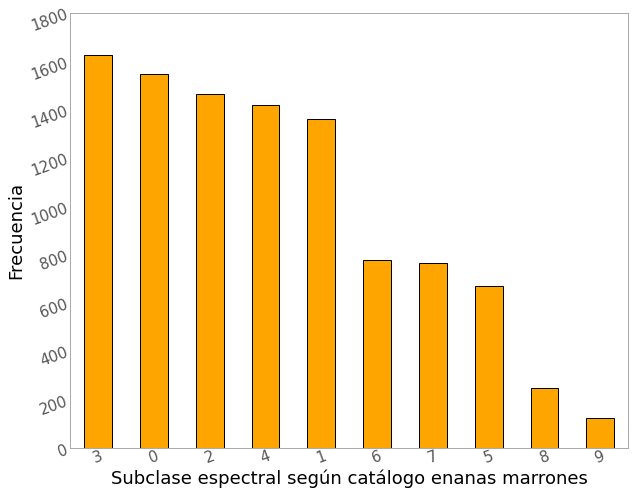

In [30]:
plot_categoria(df_info_catalogo_West, 'SpT',x_label='Subclase espectral según catálogo enanas marrones')

## Metadatos espectros enanas SDSS muestra catálogo West. df_obj_espectros_raw

In [31]:
df_obj_espectros_raw.columns

Index(['nom_fichero_fit', 'flujo', 'long_A', 'PLATE', 'MJD', 'FIBERID',
       'SPECOBJID', 'FLUXOBJID', 'BESTOBJID', 'TARGETOBJID', 'Z', 'Z_ERR',
       'PLATEQUALITY', 'CLASS', 'SUBCLASS'],
      dtype='object')

In [32]:
df_obj_espectros_raw[['PLATE','MJD','FIBERID']] = df_obj_espectros_raw[['PLATE','MJD','FIBERID']].astype(int).astype(str)

In [33]:
df_obj_espectros_raw[['PLATE-MJD-FIBER']] = df_obj_espectros_raw[['PLATE','MJD','FIBERID']].apply(lambda x: x[0]+'-'+x[1]+'-'+x[2],axis=1  )

In [34]:
n_registros=6 #variable que nos indica el número de valores más repetidos a mostrar
atrib_num, atrib_nom = descripcionDatosDataset(df_obj_espectros_raw[['PLATE-MJD-FIBER', 'PLATEQUALITY', 'CLASS', 'SUBCLASS','Z', 'Z_ERR']],n_registros)

Cantidad de filas: 9977
Cantidad de columnas: 6
----------------------------------------------------------------------------------------------------
Columnas:  Index(['PLATE-MJD-FIBER', 'PLATEQUALITY', 'CLASS', 'SUBCLASS', 'Z', 'Z_ERR'], dtype='object')
----------------------------------------------------------------------------------------------------
Columna: PLATE-MJD-FIBER
Tipo de datos: nominal
Descripción de valores:
Número valores únicos: 9977
Cantidad de nulos: 0 = 0.00%
Distribucion valores más repetidos ( 6 primeros) :
 1992-53466-145    1
1585-52962-8      1
2265-53674-315    1
2000-53495-217    1
1062-52619-338    1
1585-52962-132    1
Name: PLATE-MJD-FIBER, dtype: int64
----------------------------------------------------------------------------------------------------
Columna: PLATEQUALITY
Tipo de datos: nominal
Descripción de valores:
Número valores únicos: 3
Cantidad de nulos: 0 = 0.00%
Distribucion valores más repetidos ( 3 primeros) :
 good        6644
marginal    326

['Z', 'Z_ERR']
(2,)


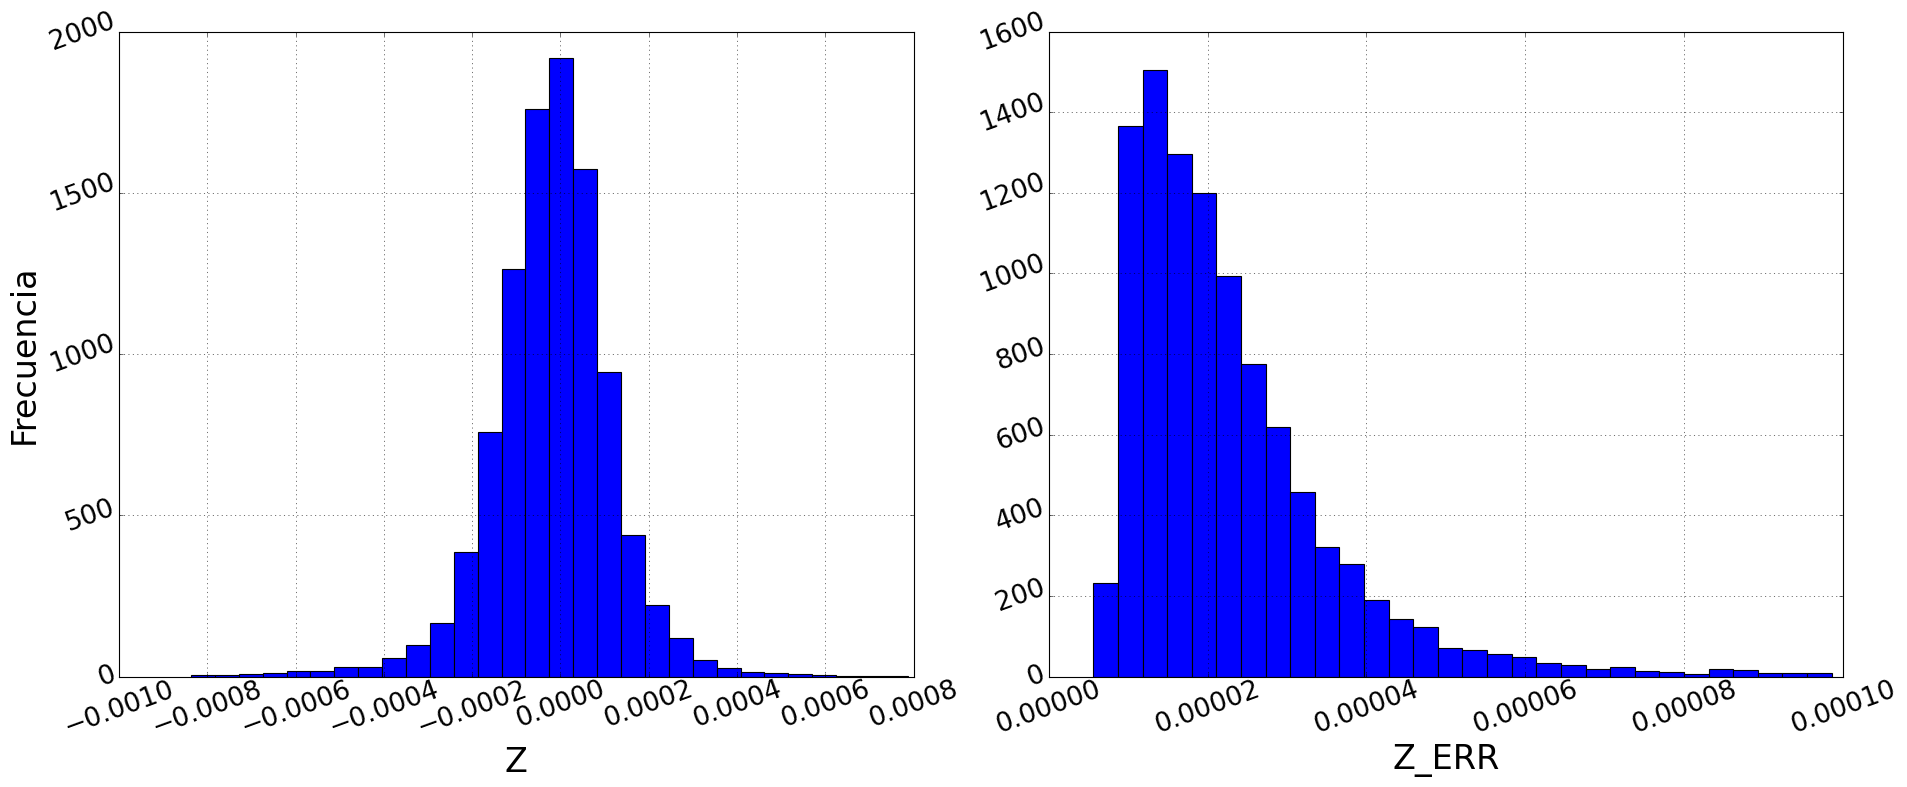

In [35]:
plot_numericos(df_obj_espectros_raw, atrib_num, outliers=True, largo = 24, alto = 10, x_label =['Z', 'Z_ERR'])

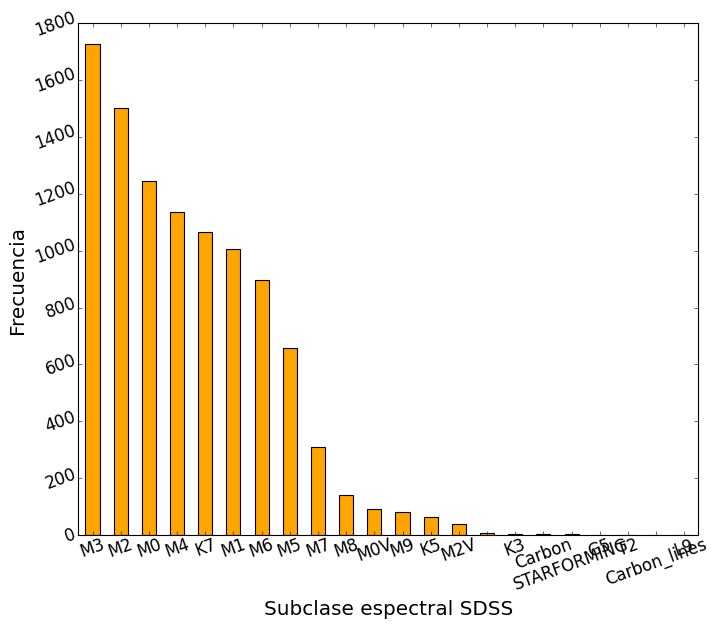

In [36]:
plot_categoria(df_obj_espectros_raw, 'SUBCLASS',x_label = 'Subclase espectral SDSS')

### Revisión de los espectros

Revisamos primero longitudes de onda y los flujos. Dicha información se ha guardado como objeto lista dentro del dataframe.

In [37]:
flujos = df_obj_espectros_raw['flujo']
flujos

0       [2.4808931351, 5.0789861679, 4.6517119408, 3.6...
1       [-4.343764782, -2.2609684467, -0.1796595156, 4...
2       [1.7600572109, -0.4636811018, 0.2445850819, 3....
3       [-0.47312766310000004, 2.6480436325000003, 1.3...
4       [-0.5323422551, 2.2146756649, 1.6134673357, -0...
                              ...                        
9972    [0.3415742517, 3.3984258175, 2.2863900661, 5.4...
9973    [-2.37241292, -3.4199938774, 0.3273103237, 0.6...
9974    [5.4115743637, 6.4919748306, 7.571758747100000...
9975    [0.8296585083, 1.0738997459, 1.9892873764, 1.3...
9976    [-0.8004633784, -0.042661309200000004, 0.35387...
Name: flujo, Length: 9977, dtype: object

En principio no haremos nada ya que filtraremos para quitar ruido y normalizaremos

#### Longitudes de onda.

In [38]:
longitudes_onda = df_obj_espectros_raw['long_A']
longitudes_onda

0       [3808.9, 3809.8, 3810.7, 3811.5, 3812.4, 3813....
1       [3801.9, 3802.8, 3803.6, 3804.5, 3805.4, 3806....
2       [3803.6, 3804.5, 3805.4, 3806.3, 3807.2, 3808....
3       [3956.4, 3957.3, 3958.2, 3959.1, 3960.0, 3961....
4       [3804.5, 3805.4, 3806.3, 3807.2, 3808.0, 3808....
                              ...                        
9972    [3811.5, 3812.4, 3813.3, 3814.2, 3815.0, 3815....
9973    [3810.7, 3811.5, 3812.4, 3813.3, 3814.2, 3815....
9974    [3803.6, 3804.5, 3805.4, 3806.3, 3807.2, 3808....
9975    [3806.3, 3807.2, 3808.0, 3808.9, 3809.8, 3810....
9976    [3806.3, 3807.2, 3808.0, 3808.9, 3809.8, 3810....
Name: long_A, Length: 9977, dtype: object

El primer detalle que observamos es que para espectro los flujos corresponden a longitudes de ondas distintas.

Analizamos los las longitudes de onda para cada espectro

In [39]:
n_long_onda = np.asarray([len(x) for x in longitudes_onda])
print(f'numero máximo de longitudes de onda contenidas en un espectro {n_long_onda.max()}, numero mínimo {n_long_onda.min()}')

numero máximo de longitudes de onda contenidas en un espectro 3861, numero mínimo 2919


Vemos que no coinciden el número de longitudes de onda que contiene cada espectro

Analicemos r la separación entre las longitudes de onda.

In [40]:
lenth_w = [np.asarray(x) for x in longitudes_onda]
separacion =np.empty([1,2])

for lo in lenth_w:
  lw_shift= lo[1:]
  lw = lo[:-1]
  separacion = np.concatenate([separacion, np.asarray([(lw_shift-lw).min(),(lw_shift-lw).max()]).reshape(-1,2)], axis=0)
separacion.shape

(9978, 2)

In [41]:
print(f"máxima separación entre longitudes {separacion[:,1].max()}, mínima separación {separacion[:,0].min()}")

máxima separación entre longitudes 8.0, mínima separación 0.7999999999997272


Podemos observar que conforme aumenta la longitud de onda aumenta la separación entre longitudes de onda (REVISAR RESOLUCION DEL ESPECTRO)

In [42]:
lw_shift-lw

array([0.9, 0.8, 0.9, ..., 2.1, 2.1, 2.1])

Respecto a los rangos tenemos:


In [43]:
rangos = np.asarray([np.asarray([min(x), max(x)]) for x in longitudes_onda])
rangos.shape

(9977, 2)

In [44]:
print(f" menor longitud de onda  inferior {rangos[:,0].min()}, mayor longitud de onda inferior {rangos[:,0].max()},\
      menor  superior {rangos[:,1].min()}, mayor  superior {rangos[:,1].max()}")

 menor longitud de onda  inferior 3785.3, mayor longitud de onda inferior 4700.0,      menor  superior 7507.6, mayor  superior 9249.1


Todos los espectros tiene flujos para longitudes de onda menores de 5000 A.

Añadimos la longitud de onda máxima al dataset.

In [45]:
df_longitudes_onda=df_obj_espectros_raw[['long_A']]

In [46]:
df_longitudes_onda['max_long_A']=df_longitudes_onda['long_A'].apply(lambda x: max(list(x)))
df_longitudes_onda.columns

Index(['long_A', 'max_long_A'], dtype='object')

In [47]:
df_obj_espectros_raw['max_long_A']= df_longitudes_onda.max_long_A

In [48]:
df_obj_espectros_raw.head(3)

,nom_fichero_fit,flujo,long_A,PLATE,MJD,FIBERID,SPECOBJID,FLUXOBJID,BESTOBJID,TARGETOBJID,Z,Z_ERR,PLATEQUALITY,CLASS,SUBCLASS,PLATE-MJD-FIBER,max_long_A
0,spec-0330-52370-0566.fits,"[2.4808931351, 5.0789861679, 4.6517119408, 3.6...","[3808.9, 3809.8, 3810.7, 3811.5, 3812.4, 3813....",330,52370,566,371702589915424768,1237674648854462571,1237674648854462571,284705344389204,2.468710e-05,0.000009,marginal,STAR,M0,330-52370-566,9204.5
1,spec-0377-52145-0512.fits,"[-4.343764782, -2.2609684467, -0.1796595156, 4...","[3801.9, 3802.8, 3803.6, 3804.5, 3805.4, 3806....",377,52145,512,424605038355179520,1237663479798366272,1237663479798366272,286013153214601,3.568000e-07,0.000022,marginal,STAR,M3,377-52145-512,9206.6
2,spec-0377-52145-0513.fits,"[1.7600572109, -0.4636811018, 0.2445850819, 3....","[3803.6, 3804.5, 3805.4, 3806.3, 3807.2, 3808....",377,52145,513,424605313233086464,1237663479261495657,1237663479261495657,286012616409296,3.311761e-04,0.000034,marginal,STAR,M2,377-52145-513,9206.6


#### Revisión flujos

In [49]:
flujos = df_obj_espectros_raw['flujo']
flujos

0       [2.4808931351, 5.0789861679, 4.6517119408, 3.6...
1       [-4.343764782, -2.2609684467, -0.1796595156, 4...
2       [1.7600572109, -0.4636811018, 0.2445850819, 3....
3       [-0.47312766310000004, 2.6480436325000003, 1.3...
4       [-0.5323422551, 2.2146756649, 1.6134673357, -0...
                              ...                        
9972    [0.3415742517, 3.3984258175, 2.2863900661, 5.4...
9973    [-2.37241292, -3.4199938774, 0.3273103237, 0.6...
9974    [5.4115743637, 6.4919748306, 7.571758747100000...
9975    [0.8296585083, 1.0738997459, 1.9892873764, 1.3...
9976    [-0.8004633784, -0.042661309200000004, 0.35387...
Name: flujo, Length: 9977, dtype: object

In [50]:
rangos_flujos = np.asarray([np.asarray([min(x), max(x)]) for x in flujos])
rangos_flujos.shape

(9977, 2)

In [51]:
print(f" menor flujo inferior{rangos_flujos[:,0].min()}, mayor flujo inferior {rangos_flujos[:,0].max()},\
      menor  superior {rangos_flujos[:,1].min()}, mayor superior {rangos_flujos[:,1].max()}")

 menor flujo inferior-383.9305725098, mayor flujo inferior 24.9497871399,      menor  superior 3.2608470917, mayor superior 5569.09375


In [52]:
from functools import reduce as reduce

Concatenamos los flujos

In [ ]:
flujos = reduce(lambda a, b: a+b, flujos)

In [ ]:
df_flujos = pd.DataFrame(data = flujos,columns=['flujos'])

In [ ]:
atrib_num, atrib_nom = descripcionDatosDataset(df_flujos)

In [ ]:
plot_numericos(df_flujos, atrib_num, outliers=True, largo = 12, alto = 8)

# Calidad de los datos

## Definición de funciones

Función que nos devuelve los outliers

In [54]:
def dev_outliers(dataframe, n=3):
  '''
  param: dataframe. Dataframe con datos numéricos
  param: n: número de veces el rango intercuartilíco usado para considerar un valor outlier
  return: dos dicionarios uno con outliers para cada atributo y otro con los índices de outliers para el atributo.
  '''
  IQR = dataframe.quantile(0.75)- dataframe.quantile(0.25)
  dic_outliers_values={}
  dic_outliers_index={}
  for i in IQR.index:
    indices = (dataframe[i] < dataframe[i].quantile(0.25)-n*IQR[i]) | (dataframe[i]>dataframe[i].quantile(0.75)+n*IQR[i])
    dic_outliers_index[i]=indices
    dic_outliers_values[i]=dataframe[i][indices]
  return dic_outliers_index, dic_outliers_values


Definimos la función que nos devuelve valores fuera de rango.

In [55]:
def out_rango(dataframe, inf, sup):
  '''
  param: dataframe. Dataframe con datos numéricos reales y continuos
  param: inf: lista con los valores inferiores del rango de cada atributo. misma dimensión que número de atributos
  param: sup: lista valores superiores del rango para cada atributo
  return: dos dicionarios uno con valore fuera de ranto para cada atributo y otro con los índices de valores fuera de rango.
  '''
  dic_outrang_values={}
  dic_outrang_index={}
  for j, i in enumerate(dataframe.columns):
    indices = (dataframe[i] <= inf[j]) | (dataframe[i]>=sup[j])
    dic_outrang_index[i]=indices
    dic_outrang_values[i]=dataframe[i][indices]
  return dic_outrang_index, dic_outrang_values


## Información del catálogo West de enanas marrones M. **df_info_catalogo_West**

Cuando revisamos los metadatos vimos que no había valores nulos. 

In [56]:
'''
Cantidad de filas: 5000
Cantidad de columnas: 3
----------------------------------------------------------------------------------------------------
Columnas:  Index(['ObjID', 'PLATE-MJD-FIBER', 'SpT'], dtype='object')
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
Columna: PLATE-MJD-FIBER
Tipo de datos: nominal
Descripción de valores:
-- Numero valores unicos: 5000
-- Valores presentes (10 primeros): ['2212-53789-356', '2212-53789-489', '2335-53730-185', '2340-53733-84', '2335-53730-383', '2783-54524-317', '2783-54524-128', '2783-54524-98', '2784-54529-92', '2784-54529-6']
-- Cantidad de nulos: 0 = 0.00%
-- Distribucion valores mas repetidos ( 3 primeros) :
 2349-53734-116    1
2218-53816-483    1
1077-52644-521    1
Name: PLATE-MJD-FIBER, dtype: int64
----------------------------------------------------------------------------------------------------
Columna: SpT
Tipo de datos: numérico
Descripción de valores:
min       0.000000
max       9.000000
mean      3.240400
std       2.276059
median    3.000000
Name: SpT, dtype: float64 

-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
'''

"\nCantidad de filas: 5000\nCantidad de columnas: 3\n----------------------------------------------------------------------------------------------------\nColumnas:  Index(['ObjID', 'PLATE-MJD-FIBER', 'SpT'], dtype='object')\n----------------------------------------------------------------------------------------------------\n\n----------------------------------------------------------------------------------------------------\nColumna: PLATE-MJD-FIBER\nTipo de datos: nominal\nDescripción de valores:\n-- Numero valores unicos: 5000\n-- Valores presentes (10 primeros): ['2212-53789-356', '2212-53789-489', '2335-53730-185', '2340-53733-84', '2335-53730-383', '2783-54524-317', '2783-54524-128', '2783-54524-98', '2784-54529-92', '2784-54529-6']\n-- Cantidad de nulos: 0 = 0.00%\n-- Distribucion valores mas repetidos ( 3 primeros) :\n 2349-53734-116    1\n2218-53816-483    1\n1077-52644-521    1\nName: PLATE-MJD-FIBER, dtype: int64\n-----------------------------------------------------------

No hay problemas con la clave principal ObjID


En el caso de **PLATE-MJD-FIBER** tampoco hay ningún problema. 
Respecto a subclase espectral tampoco hay ningún valor fuera de los valores.


In [57]:
pd.set_option('display.max_columns', 100)

## Espectros. df_obj_espectros_raw

In [58]:
'''
----------------------------------------------------------------------------------------------------
Columna: CLASS
Tipo de datos: nominal
Descripción de valores:
Número valores únicos: 2
Cantidad de nulos: 0 = 0.00%
Distribucion valores más repetidos ( 2 primeros) :
 STAR    4999
QSO        1
Name: CLASS, dtype: int64
----------------------------------------------------------------------------------------------------
Columna: SUBCLASS
Tipo de datos: nominal
Descripción de valores:
Número valores únicos: 16
Cantidad de nulos: 0 = 0.00%
Distribucion valores más repetidos ( 16 primeros) :
 M3        965
M2        874
M4        624
M0        612
M1        500
M6        424
K7        390
M5        322
M7        131
M8         68
M9         35
M0V        29
M2V        16
K5          8
            1
Carbon      1
Name: SUBCLASS, dtype: int64
-----------------------------------

'''

'\n----------------------------------------------------------------------------------------------------\nColumna: CLASS\nTipo de datos: nominal\nDescripción de valores:\nNúmero valores únicos: 2\nCantidad de nulos: 0 = 0.00%\nDistribucion valores más repetidos ( 2 primeros) :\n STAR    4999\nQSO        1\nName: CLASS, dtype: int64\n----------------------------------------------------------------------------------------------------\nColumna: SUBCLASS\nTipo de datos: nominal\nDescripción de valores:\nNúmero valores únicos: 16\nCantidad de nulos: 0 = 0.00%\nDistribucion valores más repetidos ( 16 primeros) :\n M3        965\nM2        874\nM4        624\nM0        612\nM1        500\nM6        424\nK7        390\nM5        322\nM7        131\nM8         68\nM9         35\nM0V        29\nM2V        16\nK5          8\n            1\nCarbon      1\nName: SUBCLASS, dtype: int64\n-----------------------------------\n\n'

### Clase

Según las clasificación de SDSS hay un Cuásar.

In [59]:
'''
QSO         1

'''

'\nQSO         1\n\n'

La distribución es la siguiente:

In [60]:
df_obj_espectros_raw[['CLASS', 'SUBCLASS']].groupby(by=['CLASS','SUBCLASS']).size()

CLASS   SUBCLASS    
GALAXY                     4
        STARFORMING        2
QSO                        2
STAR    Carbon             3
        Carbon_lines       1
        G5                 1
        K3                 4
        K5                63
        K7              1067
        L9                 1
        M0              1245
        M0V               90
        M1              1006
        M2              1500
        M2V               40
        M3              1725
        M4              1137
        M5               658
        M6               898
        M7               308
        M8               140
        M9                81
        T2                 1
dtype: int64

### Calidad placas

In [61]:
'''
Columna: PLATEQUALITY
Tipo de datos: nominal
Descripción de valores:
Número valores únicos: 3
Cantidad de nulos: 0 = 0.00%
Distribucion valores más repetidos ( 3 primeros) :
 good        6644
marginal    3260
bad           73
'''

'\nColumna: PLATEQUALITY\nTipo de datos: nominal\nDescripción de valores:\nNúmero valores únicos: 3\nCantidad de nulos: 0 = 0.00%\nDistribucion valores más repetidos ( 3 primeros) :\n good        6644\nmarginal    3260\nbad           73\n'

### Longitudes de onda. 

En principio pediremos que las longitudes de onda lleguen hasta los 900 nm. Las plantillas llegan hasta los 8500 luego de esta manera garantizamos que cubrimos el rango de estás. Llegamos hasta los 9000 ya que a alta longitudes de onda se puede encontrar información relevante respecto a la temperatura. 

In [62]:
print(f"número de espectros con rango inferior a los 9000 A {(df_obj_espectros_raw['max_long_A']<9000).sum()}")

número de espectros con rango inferior a los 9000 A 22


### Rangos de los flujos.

Hemos visto que teníamos flujos negativos. Esto no es posible ya que el flujo mínimo es cero. Aceptaremos los valores negativos ya que se achacan al ruido. Estos debido a la baja temperatura de los objetos se da en las longitudes de onda menores ya que es donde las enanas emiten menor energía. 

### Valores faltantes o nulos en longitudes de onda y flujos.

Ya vimos que la diferencia máxima entre longitudes de onda consecutivas es de 2 A.. Luego no longitudes de onda faltantes.

Comprobamos si para cada espectro el número de datos de los flujos y el de longitudes de onda es el mismo. 

In [63]:
dif_long_flujos = df_obj_espectros_raw[['long_A','flujo']].apply(lambda x: len(x[1])-len(x[0]),axis = 1)


In [64]:
dif_long_flujos.max()

0

Vemos que no hay problemas

Veamos valores nulos de las longitudes de onda y flujos. Como el número de longitudes de onda cambia de un espectro a otro tendremos que revisar objeto por objeto.

In [65]:
nulos_espectros = df_obj_espectros_raw['flujo'].apply(lambda x: np.isnan(x).any())
nulos_espectros.sum()

0

In [66]:
nulos_longitudes = df_obj_espectros_raw['long_A'].apply(lambda x: np.isnan(x).any())
nulos_longitudes.sum()

0

Vemos que no hay valores nulos

#### Búsqueda de datos extrapolados

Definimos una función par ver si hay extrapolaciones. Lo que hará la función es ver las pendientes entre intervalos consecutivos es la misma. 

In [67]:
def es_extrapolado(espectro, long_onda, precision, salto, secuencia):
  """
  Muestrea el espectro y calcula  pendiente del espectro entre los puntos
  cuando la pendiente no cambia en número determinado de muestreos devuelve True

  :param : espectro. espectro[0] lista con los flujos, espectro[1] lista con las longitudes de onda
  :param : long_onda. Lista de dos elementos. Rango de  longitudes de onda donde se evaluará si hay interpolación
  :param : precision. Rango de precisión para considerar que dos pendientes son iguales
  :param: salto: número de longitudes de onda usadas para calcular la pendiente.
  :param: secuencia número de veces consecutivas que exigiremos que las pendientes sean iguales para marcar que el espectro es extrapolado.
          
  :Return: booleano. True si el espectro ha sido extrapolado, False si no
           
  """
  cuenta = 0
  pendiente=0
  long =  np.asarray(espectro[1])
  flujos= np.asarray(espectro[0])
  #seleccionamos los índices que cumplan
  indices = np.where((long>long_onda[0])&(long<long_onda[1]))
  #muestreamos
  flujos= flujos[indices][::salto]
  long =  long[indices][::salto]
  #print(flujos)
  #print(long,'\n')
  dif_flujos = flujos[1:] - flujos[:-1]
  dif_long = long[1:] - long[:-1]
  pendientes = dif_flujos/dif_long


  for i, elem in enumerate(pendientes):
    if np.abs(elem-pendiente)<=precision:
      cuenta+=1
      if cuenta ==secuencia:
        return True
        break
    else:
      cuenta = 0
    pendiente =elem
  return False



Solo miraremos si hay extrapolación en el rango 5000-8500 Armstrong. 

In [68]:
lista_extrapolado = df_obj_espectros_raw[['flujo','long_A']].apply(es_extrapolado,long_onda=[5000,9000],precision=0.0001,salto = 5,\
                                                                secuencia =8,axis=1)

In [69]:
print(f"Número de espectros con flujos extrapolados ´{lista_extrapolado.sum()}")

Número de espectros con flujos extrapolados ´202


Añadimos una columna al dataset con la información de si el expectro ha sido extrapolado

In [70]:
df_obj_espectros_raw['extrapolado']=lista_extrapolado

Inspeccionamos los expectros extrapolados

In [71]:
df_extrapolado = df_obj_espectros_raw[['flujo','long_A']][lista_extrapolado].reset_index(drop=True)
df_extrapolado.shape

(202, 2)

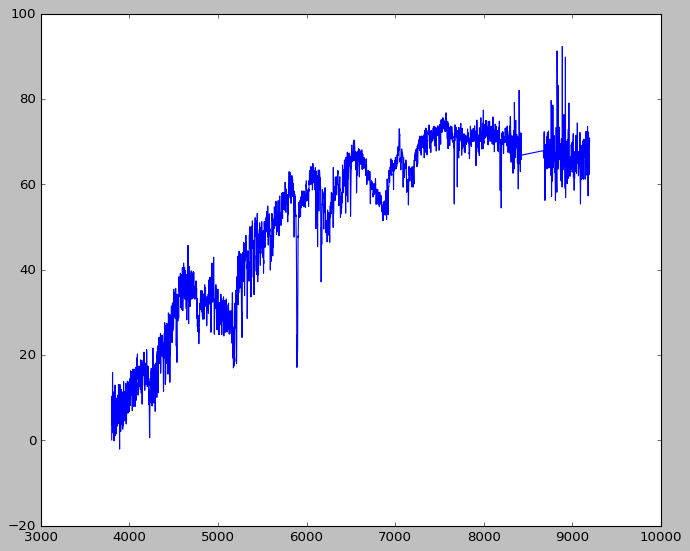

In [72]:
indice =10
plt.figure(figsize = (10,8))
x = np.asarray(df_extrapolado.loc[indice]['long_A'])
y = np.asarray(df_extrapolado.loc[indice]['flujo'])

plt.plot(x,y)

Vemos así como nos cada la distribución por subclase si quitamos los espectros extrapolados

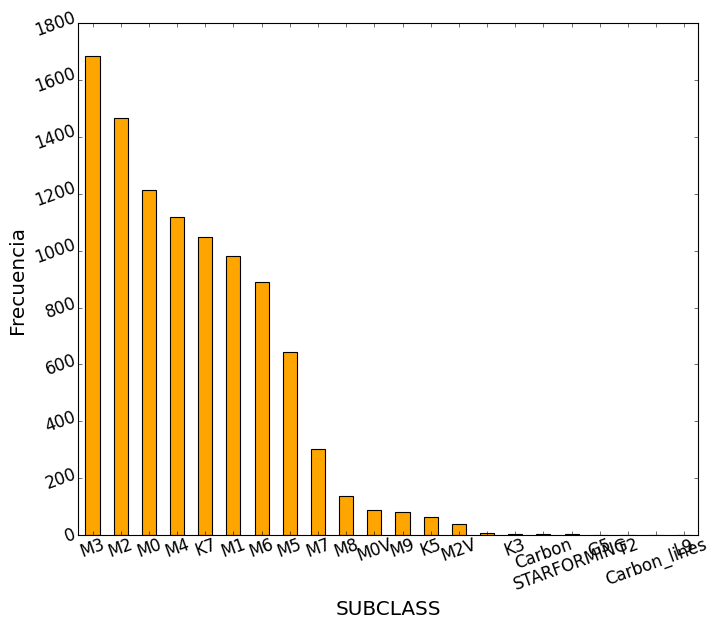

In [73]:
plot_categoria(df_obj_espectros_raw[~lista_extrapolado], 'SUBCLASS')

Vemos que aún tenemos representación de todas las clases

### Valores atípicos

In [74]:
dic_indices, dic_valores = dev_outliers(df_obj_espectros_raw[[ 'Z', 'Z_ERR']])

In [75]:
outliers=pd.Series([False]*df_obj_espectros_raw.shape[0])
for clave, valor in dic_indices.items():
  print(f"Número de outliers para el atributo {clave} {np.asarray(valor).sum()}")
  outliers = outliers | valor
print(f"Número de tuplas con algún outlier {outliers.sum()}")

Número de outliers para el atributo Z 98
Número de outliers para el atributo Z_ERR 158
Número de tuplas con algún outlier 245


Creamos una columna para marcar los objetos con algún outlier.

In [76]:
df_obj_espectros_raw['outlier_info'] = outliers

### Valores fuera de rango

In [77]:
inf = [-0.002,0]
sup = [0.002,np.inf]

dic_indices, dic_valores = out_rango(df_obj_espectros_raw[[ 'Z', 'Z_ERR']],inf,sup)

También veremos valores fuera de rango en las subclases

In [78]:
sub_esp_clase_out_rango = ~('M' in df_obj_espectros_raw['SUBCLASS'])

In [79]:
sub_esp_clase_out_rango = ~ df_obj_espectros_raw['SUBCLASS'].apply(lambda x: 'M' in x)

In [80]:

print(f"subclase espectral fuera de rango {sub_esp_clase_out_rango.sum()}")

subclase espectral fuera de rango 1147


No haremos nada con la clase espectral ya que eso es debido a errores de SDSS. Todo el catálogo son M.

In [81]:
outrango=pd.Series([False]*df_obj_espectros_raw.shape[0])
for clave, valor in dic_indices.items():
  print(f"Número de valores fuera de rango para el atributo {clave} {np.asarray(valor).sum()}")
  outrango = outrango | valor
print(f"Número de tuplas con algún valor fuera de rango {outrango.sum()}")

Número de valores fuera de rango para el atributo Z 7
Número de valores fuera de rango para el atributo Z_ERR 0
Número de tuplas con algún valor fuera de rango 7


In [82]:
  df_obj_espectros_raw['outrango_info'] = outrango

## **Claves principales.**

### df_info_catalogo_West

Vemos que no hay problemas de claves principales.

In [83]:
'''
Cantidad de filas: 10000
Cantidad de columnas: 2
----------------------------------------------------------------------------------------------------
Columnas:  Index(['PLATE-MJD-FIBER', 'SpT'], dtype='object')
----------------------------------------------------------------------------------------------------
Columna: PLATE-MJD-FIBER
Tipo de datos: nominal
Descripción de valores:
Número valores únicos: 10000
Cantidad de nulos: 0 = 0.00%
Distribucion valores más repetidos ( 12 primeros) :
'''

"\nCantidad de filas: 10000\nCantidad de columnas: 2\n----------------------------------------------------------------------------------------------------\nColumnas:  Index(['PLATE-MJD-FIBER', 'SpT'], dtype='object')\n----------------------------------------------------------------------------------------------------\nColumna: PLATE-MJD-FIBER\nTipo de datos: nominal\nDescripción de valores:\nNúmero valores únicos: 10000\nCantidad de nulos: 0 = 0.00%\nDistribucion valores más repetidos ( 12 primeros) :\n"

### df_obj_espectros_raw

In [84]:
descripcionDatosDataset(df_obj_espectros_raw[['PLATE-MJD-FIBER']].astype('str'))

Cantidad de filas: 9977
Cantidad de columnas: 1
----------------------------------------------------------------------------------------------------
Columnas:  Index(['PLATE-MJD-FIBER'], dtype='object')
----------------------------------------------------------------------------------------------------
Columna: PLATE-MJD-FIBER
Tipo de datos: nominal
Descripción de valores:
Número valores únicos: 9977
Cantidad de nulos: 0 = 0.00%
Distribucion valores más repetidos ( 5 primeros) :
 1992-53466-145    1
1585-52962-8      1
2265-53674-315    1
2000-53495-217    1
1062-52619-338    1
Name: PLATE-MJD-FIBER, dtype: int64
----------------------------------------------------------------------------------------------------


([], ['PLATE-MJD-FIBER'])

In [85]:
df_obj_espectros_raw.columns

Index(['nom_fichero_fit', 'flujo', 'long_A', 'PLATE', 'MJD', 'FIBERID',
       'SPECOBJID', 'FLUXOBJID', 'BESTOBJID', 'TARGETOBJID', 'Z', 'Z_ERR',
       'PLATEQUALITY', 'CLASS', 'SUBCLASS', 'PLATE-MJD-FIBER', 'max_long_A',
       'extrapolado', 'outlier_info', 'outrango_info'],
      dtype='object')

Vemos que no hay ningún problema de claves principales. **Hemos de tener en cuenta que este campo nos identifica el espectro** Asegurarse, no el objeto y puede suceder que un objeto tenga varios espectros. Sucede lo mismo con PLATEQUALITY', 'CLASS', 'SUBCLASS'

## Claves foraneas, integridad referencial. 

Como tenemos que integrar los ficheros analicemos si tenemos algún problema con las claves foraneas.

Lo primero es cambiar el nombre a la columna 'specobj_id' de df_info_espectros ya que es la que usaremos para integrar df_obj_espectros_raw con df_info_espectros.

Vemos que no hay ningún problema en el caso de integrar df_info_espectros cond df_obj_espectros_raw 

In [86]:
print(f" filas sin problemas de clave foranea {df_obj_espectros_raw.drop_duplicates('PLATE-MJD-FIBER').merge(df_info_catalogo_West.drop_duplicates('PLATE-MJD-FIBER'), how = 'inner', on = 'PLATE-MJD-FIBER').shape[0]}")

 filas sin problemas de clave foranea 9977


# Selección de atributos de *df_info_espectros*.

Seleccionamos los datos de df_info_espectros

In [87]:
lista_espec  = ['PLATE-MJD-FIBER','flujo', 'long_A', 'PLATEQUALITY', 'extrapolado','max_long_A','Z','Z_ERR', 'CLASS', 'SUBCLASS','outlier_info',
       'outrango_info']
df_info_espec = df_obj_espectros_raw[lista_espec]

df_info_espec.head(3)

,PLATE-MJD-FIBER,flujo,long_A,PLATEQUALITY,extrapolado,max_long_A,Z,Z_ERR,CLASS,SUBCLASS,outlier_info,outrango_info
0,330-52370-566,"[2.4808931351, 5.0789861679, 4.6517119408, 3.6...","[3808.9, 3809.8, 3810.7, 3811.5, 3812.4, 3813....",marginal,False,9204.5,2.468710e-05,0.000009,STAR,M0,False,False
1,377-52145-512,"[-4.343764782, -2.2609684467, -0.1796595156, 4...","[3801.9, 3802.8, 3803.6, 3804.5, 3805.4, 3806....",marginal,False,9206.6,3.568000e-07,0.000022,STAR,M3,False,False
2,377-52145-513,"[1.7600572109, -0.4636811018, 0.2445850819, 3....","[3803.6, 3804.5, 3805.4, 3806.3, 3807.2, 3808....",marginal,False,9206.6,3.311761e-04,0.000034,STAR,M2,False,False


# Limpieza de datos.

## df_info_catalogo_West

No teníamos ningún problema

## df_info_espec. Data set con la información relevante de df_obj_espec_raw

### Corrimiento al rojo

Para el corrimiento al rojo teníamos para z un máximo de 0.4

Un redshift tan alto como 0.49 no tiene ningún sentido. Comprobamos de que objeto se trata.
(COMPROBAR RANGOS Z)

In [88]:
df_info_espec[['CLASS', 'SUBCLASS']][df_info_espec['Z']>0.01]

,CLASS,SUBCLASS
3407,QSO,
6306,GALAXY,STARFORMING
6427,GALAXY,
7749,QSO,
9121,GALAXY,
9131,GALAXY,STARFORMING
9226,GALAXY,


No eliminamos ninguno

### Longitudes de onda fuera de rango.

In [89]:
long_outrango = df_info_espec.max_long_A<9000
long_outrango.sum()

22

In [90]:
print(f"objetos antes de eliminación {df_info_espec.shape[0]}")
df_info_espec = df_info_espec[ ~long_outrango]
print(f"objetos después de eliminación {df_info_espec.shape[0]}")

objetos antes de eliminación 9977
objetos después de eliminación 9955


### Calidad placas

Veamos cuántos espectros teníamos con mala calidad. 

In [91]:
mala_calidad = (df_info_espec['PLATEQUALITY']=='bad')
print(f"Placas con calidad defectuosa {mala_calidad.sum()}")

Placas con calidad defectuosa 73


Las eliminamos

In [92]:
print(f"objetos antes de eliminación {df_info_espec.shape[0]}")
df_info_espec = df_info_espec[~mala_calidad]
df_info_espec.shape[0]

objetos antes de eliminación 9955


9882

### Datos extrapolados.

Quitaremos también aquellos datos extrapolados

In [93]:
index_extrapolado = df_info_espec.extrapolado==True
print(f"número de espectros estrapolados {index_extrapolado.sum()}")

número de espectros estrapolados 200


In [94]:
print(f"objetos antes de eliminación {df_info_espec.shape[0]}")
df_info_espec = df_info_espec[ ~index_extrapolado]
print(f"objetos después de eliminación {df_info_espec.shape[0]}")

objetos antes de eliminación 9882
objetos después de eliminación 9682


### Datos sin subclase espectral.

Habíamos visto que teníamos un objeto del cual no disponíamos de la clase espectral. NO LO ELIMINAMOS.


In [95]:
df_info_espec.SUBCLASS.unique()

array(['M0', 'M3', 'M2', 'M4', 'M5', 'M6', 'M8', 'K7', 'M1', 'M7', 'M2V',
       'M9', 'M0V', 'K5', '', 'Carbon', 'Carbon_lines', 'STARFORMING',
       'K3', 'G5', 'T2', 'L9'], dtype=object)

In [96]:
indices_sin_clase = df_info_espec.SUBCLASS==""
print(f'Número de espectros sin subclase {indices_sin_clase.sum()}')

Número de espectros sin subclase 6


In [97]:
temp=df_info_espec.copy()

In [98]:

print(f'Número de objetos antes de eliminar {df_info_espec.shape[0]}')
df_info_espec = df_info_espec[~indices_sin_clase]
print(f'Número de objetos después de eliminar {df_info_espec.shape[0]}')

Número de objetos antes de eliminar 9682
Número de objetos después de eliminar 9676


#Integración datasets. df_info_espec y df_info_catalogo_West

En df_info_espec tenemos 9676 objetos. En df_info_catalogo_West el número de registros es de 10000. 

Revisamos la columnas antes de la integración

In [99]:
df_info_espec.columns

Index(['PLATE-MJD-FIBER', 'flujo', 'long_A', 'PLATEQUALITY', 'extrapolado',
       'max_long_A', 'Z', 'Z_ERR', 'CLASS', 'SUBCLASS', 'outlier_info',
       'outrango_info'],
      dtype='object')

In [100]:
df_info_catalogo_West.columns

Index(['PLATE', 'MJD', 'FIBER', 'ObjID', 'RAJ2000', 'DEJ2000', 'umag',
       'e_umag', 'gmag', 'e_gmag', 'rmag', 'e_rmag', 'imag', 'e_imag', 'zmag',
       'e_zmag', 'Au', 'Ag', 'Ar', 'Ai', 'Az', 'MJDr', 'RV', 'SpT', 'W_Ha_',
       'e_W_Ha_', 'HaS_N', 'Ha_c', 'W_Hb_', 'e_W_Hb_', 'HbS_N', 'Hb_c',
       'W_Hg_', 'e_W_Hg_', 'HgS_N', 'Hg_c', 'W_Hd_', 'e_W_Hd_', 'HdS_N',
       'Hd_c', 'W_Ca_', 'e_W_Ca_', 'CaS_N', 'CA_c', 'TiO5', 'e_TiO5', 'CaH1',
       'e_CaH1', 'CaH2', 'e_CaH2', 'CaH3', 'e_CaH3', 'TiO1', 'e_TiO1', 'TiO2',
       'e_TiO2', 'TiO3', 'e_TiO3', 'TiO4', 'e_TiO4', 'TiO5R', 'e_TiO5R',
       'TiO8', 'e_TiO8', 'CaOH', 'zeta', 'e_zeta', 'WDM', 'pmOK', 'SDSS7',
       'Sloan', 'SimbadName', 'recno', 'PLATE-MJD-FIBER'],
      dtype='object')

En principio el único dato que nos interesa del catálogo de la enanas marrones M es la subclase espectral ya que estas difieren de las asignadas

In [101]:

df_info_obj_espec = df_info_espec.merge(df_info_catalogo_West[['SpT','PLATE-MJD-FIBER']], \
                                        how = 'left', on = 'PLATE-MJD-FIBER')
df_info_obj_espec.drop_duplicates(subset= ['PLATE-MJD-FIBER'], keep='first', inplace=True, ignore_index=True)
print(f'número de registros {df_info_obj_espec.shape[0]}')
df_info_obj_espec.head(3)


número de registros 9676


,PLATE-MJD-FIBER,flujo,long_A,PLATEQUALITY,extrapolado,max_long_A,Z,Z_ERR,CLASS,SUBCLASS,outlier_info,outrango_info,SpT
0,330-52370-566,"[2.4808931351, 5.0789861679, 4.6517119408, 3.6...","[3808.9, 3809.8, 3810.7, 3811.5, 3812.4, 3813....",marginal,False,9204.5,2.468710e-05,0.000009,STAR,M0,False,False,0
1,377-52145-512,"[-4.343764782, -2.2609684467, -0.1796595156, 4...","[3801.9, 3802.8, 3803.6, 3804.5, 3805.4, 3806....",marginal,False,9206.6,3.568000e-07,0.000022,STAR,M3,False,False,4
2,377-52145-513,"[1.7600572109, -0.4636811018, 0.2445850819, 3....","[3803.6, 3804.5, 3805.4, 3806.3, 3807.2, 3808....",marginal,False,9206.6,3.311761e-04,0.000034,STAR,M2,False,False,3


In [102]:
#df_info_obj_espec = df_info_espec.copy()

# Tratamiento de los datos

## Asignar la clase de metalicidad a las enanas marrones.

Vamos a asignar la clase de metalicidad. Como en sabemos que son enanas marrones y esa es la única información que tenemos asignaremos la clase de metalicidad solar dM.

In [103]:
df_info_obj_espec['clase_metalicidad']='dM'
df_info_obj_espec['clase_metalicidad'].value_counts()

dM    9676
Name: clase_metalicidad, dtype: int64

## Subclases espectrales.

Habíamos visto que en algunos casos además de la subclase espectral teníamos la clase de luminosidad. Como tenemos poca información de ella para pocos objetos no trataremos con ella. Debido a esto la eliminaremos. 

In [111]:
temp = df_info_obj_espec.copy()

In [112]:
df_info_obj_espec = temp.copy()

In [113]:
df_info_obj_espec['SUBCLASS'].value_counts()

M3              1665
M2              1449
M0              1200
M4              1100
K7              1038
M1               971
M6               888
M5               639
M7               302
M8               139
M0V               89
M9                81
K5                63
M2V               39
K3                 4
Carbon             3
STARFORMING        2
G5                 1
Carbon_lines       1
T2                 1
L9                 1
Name: SUBCLASS, dtype: int64

Primeramente crearemos una columna subclass que será la misma que asigna SDSS y coincide con la de la muestra de subenanas obtenidas de SDSS

In [114]:
df_info_obj_espec['SUBCLASS'] = df_info_obj_espec['SUBCLASS'].apply(lambda x: x[:2])

In [115]:
df_info_obj_espec['SUBCLASS'].value_counts()

M3    1665
M2    1488
M0    1289
M4    1100
K7    1038
M1     971
M6     888
M5     639
M7     302
M8     139
M9      81
K5      63
K3       4
Ca       4
ST       2
G5       1
T2       1
L9       1
Name: SUBCLASS, dtype: int64

In [116]:
df_info_obj_espec['SUBCLASS'].unique()

array(['M0', 'M3', 'M2', 'M4', 'M5', 'M6', 'M8', 'K7', 'M1', 'M7', 'M9',
       'K5', 'Ca', 'ST', 'K3', 'G5', 'T2', 'L9'], dtype=object)

Creamos una nueva clase espectral que será la del catálogo

In [117]:
df_info_obj_espec['subclass_c']=df_info_obj_espec.SpT.apply(lambda x: 'M'+str(x))

In [118]:
df_info_obj_espec.subclass_c.value_counts()

M3    1581
M0    1492
M2    1414
M4    1366
M1    1297
M6     764
M7     754
M5     646
M8     241
M9     121
Name: subclass_c, dtype: int64

In [119]:
frecuencias = pd.crosstab(df_info_obj_espec['SUBCLASS'], df_info_obj_espec['subclass_c']) 
frecuencias

subclass_c,M0,M1,M2,M3,M4,M5,M6,M7,M8,M9
SUBCLASS,,,,,,,,,,
Ca,3,1,0,0,0,0,0,0,0,0
G5,1,0,0,0,0,0,0,0,0,0
K3,4,0,0,0,0,0,0,0,0,0
K5,62,1,0,0,0,0,0,0,0,0
K7,952,86,0,0,0,0,0,0,0,0
L9,0,0,1,0,0,0,0,0,0,0
M0,446,776,57,9,1,0,0,0,0,0
M1,15,389,538,27,2,0,0,0,0,0
M2,3,30,763,634,57,1,0,0,0,0


## Corrección de los espectros por el redshift.

Vamos a corregir las longitudes de ondas los espectros por los redshift. Usaremos $\frac{\lambda_o - \lambda_i}{\lambda_i} = Z$, con $\lambda_o$  y  $\lambda_i$  longitudes de onda observada y emitida respectivamente. Luego $\lambda_i = \frac{\lambda_o}{1+ Z}$

Podemos ver de cuánto estamos hablando en el caso de longitudes de onda de 3000 y 9000 Armstrongs para Z mínima y máxima.

In [120]:
df_info_obj_espec['Z'].describe()

count    9676.000000
mean       -0.000005
std         0.001275
min        -0.001326
25%        -0.000093
50%        -0.000015
75%         0.000058
max         0.118812
Name: Z, dtype: float64

In [121]:
lo_inf = 3000
lo_sup = 9000
z_min = -0.000868
z_max =  0.000825
primer_cuartil = -0.000064
tercer_cuartil = 0.000082

print(f" variación longitud onda para Z = {z_min} y longitud de onda de {lo_inf}: {z_min*lo_inf}")
print(f" variación longitud onda para Z = {z_max} y longitud de onda de {lo_inf}: {z_max*lo_inf}")
print(f" variación longitud onda para Z = {z_min} y longitud de onda de {lo_sup}: {z_min*lo_sup}")
print(f" variación longitud onda para Z = {z_max} y longitud de onda de {lo_sup}: {z_max*lo_sup}")
print(f" variación longitud onda para Z = {primer_cuartil} y longitud de onda de {lo_inf}: {primer_cuartil*lo_inf}")
print(f" variación longitud onda para Z = {primer_cuartil} y longitud de onda de {lo_sup}: {primer_cuartil*lo_sup}")
print(f" variación longitud onda para Z = {tercer_cuartil} y longitud de onda de {lo_inf}: {tercer_cuartil*lo_inf}")
print(f" variación longitud onda para Z = {tercer_cuartil} y longitud de onda de {lo_sup}: {tercer_cuartil*lo_sup}")

 variación longitud onda para Z = -0.000868 y longitud de onda de 3000: -2.6039999999999996
 variación longitud onda para Z = 0.000825 y longitud de onda de 3000: 2.475
 variación longitud onda para Z = -0.000868 y longitud de onda de 9000: -7.811999999999999
 variación longitud onda para Z = 0.000825 y longitud de onda de 9000: 7.425
 variación longitud onda para Z = -6.4e-05 y longitud de onda de 3000: -0.192
 variación longitud onda para Z = -6.4e-05 y longitud de onda de 9000: -0.576
 variación longitud onda para Z = 8.2e-05 y longitud de onda de 3000: 0.246
 variación longitud onda para Z = 8.2e-05 y longitud de onda de 9000: 0.738


Para los valores entre el primer y el tercer cuartil de la longitud de onda la variación es inferior a 1 Armstrong. 

Sin embargo conforme nos acercamos a los extremos de la distribución de Z el corrimiento en el espectro para grandes longitudes de onda puede ser considerable.

En los metadatos vimos que las magnitudes del los errores de Z también eran grandes. Por ello solo corregiremos los espectros que cumplan Z > 2 errZ

In [122]:
#Inspeccionamos la razón Z/zerr
np.abs( df_info_obj_espec['Z']/df_info_obj_espec['Z_ERR'] ).describe()

count    9676.000000
mean        6.862235
std        94.427543
min         0.000041
25%         1.680031
50%         3.642067
75%         6.823006
max      7680.143245
dtype: float64

Se define la función para corregir las longitudes de onda por el redshift

In [123]:
def correccion_Z(lista, limite,rango = True, outlier=True):
  """
  Modifica las longitudes de onda en función de z.
  param: lista
    : param[0] lista. lista con las longitudes de onda
    : param[1]. Z.
    : param[2]. error de Z
    : param[3]. Booleano que indica si el valor de z está fuera de rango
    : param[4]. Booleano que indica si el valor de z es outlier

  : param: limite. Si abs(Z/erroZ) >= limite se corrige la longitud de onda
  : param: rango. Si True no corrige valores fuera de rango
  : param: outlier. Si True no corrige para Z outlier

  : return: lista con las longitudes de onda corregidas
  """
  long = lista[0]
  z = lista[1]
  errorZ = lista[2]
  es_outrango = lista[3]
  es_outlier = lista[4]

  no_corregir_lo = (np.abs(z/errorZ)< limite) | (es_outrango*rango) |(es_outlier*outlier)

  if not no_corregir_lo:
    long = list(map(lambda x: np.around(x/(1+z),1),long))
  return long

In [124]:
df_info_obj_espec_zcorr = df_info_obj_espec.copy()
df_info_obj_espec_zcorr['long_A'] = df_info_obj_espec[['long_A','Z','Z_ERR','outrango_info','outlier_info']].apply(correccion_Z, limite =2, axis=1)
df_info_obj_espec_zcorr.head(4)


,PLATE-MJD-FIBER,flujo,long_A,PLATEQUALITY,extrapolado,max_long_A,Z,Z_ERR,CLASS,SUBCLASS,outlier_info,outrango_info,SpT,clase_metalicidad,subclass_c
0,330-52370-566,"[2.4808931351, 5.0789861679, 4.6517119408, 3.6...","[3808.8, 3809.7, 3810.6, 3811.4, 3812.3, 3813....",marginal,False,9204.5,2.468710e-05,0.000009,STAR,M0,False,False,0,dM,M0
1,377-52145-512,"[-4.343764782, -2.2609684467, -0.1796595156, 4...","[3801.9, 3802.8, 3803.6, 3804.5, 3805.4, 3806....",marginal,False,9206.6,3.568000e-07,0.000022,STAR,M3,False,False,4,dM,M4
2,377-52145-513,"[1.7600572109, -0.4636811018, 0.2445850819, 3....","[3802.3, 3803.2, 3804.1, 3805.0, 3805.9, 3806....",marginal,False,9206.6,3.311761e-04,0.000034,STAR,M2,False,False,3,dM,M3
3,378-52146-160,"[-0.5323422551, 2.2146756649, 1.6134673357, -0...","[3805.0, 3805.9, 3806.8, 3807.7, 3808.5, 3809....",marginal,False,9202.4,-1.333149e-04,0.000050,STAR,M4,False,False,5,dM,M5


Podemos comprobar las correcciones. 

In [126]:
indice = 4
print(f" z/error z : {np.abs(df_info_obj_espec.loc[indice]['Z']/df_info_obj_espec.loc[indice]['Z_ERR'])}")
print(f" antes correccion: {df_info_obj_espec.loc[indice]['long_A']}")
print(f"después correccion: {df_info_obj_espec_zcorr.loc[indice]['long_A']}")
df_info_obj_espec.loc[indice]['outlier_info'] | df_info_obj_espec.loc[indice]['outrango_info']

 z/error z : 2.0977109390565936
 antes correccion: [3805.4, 3806.3, 3807.2, 3808.0, 3808.9, 3809.8, 3810.7, 3811.5, 3812.4, 3813.3, 3814.2, 3815.0, 3815.9, 3816.8, 3817.7, 3818.6, 3819.4, 3820.3, 3821.2, 3822.1, 3823.0, 3823.8, 3824.7, 3825.6, 3826.5, 3827.4, 3828.2, 3829.1, 3830.0, 3830.9, 3831.8, 3832.7, 3833.5, 3834.4, 3835.3, 3836.2, 3837.1, 3838.0, 3838.8, 3839.7, 3840.6, 3841.5, 3842.4, 3843.3, 3844.1, 3845.0, 3845.9, 3846.8, 3847.7, 3848.6, 3849.5, 3850.3, 3851.2, 3852.1, 3853.0, 3853.9, 3854.8, 3855.7, 3856.6, 3857.4, 3858.3, 3859.2, 3860.1, 3861.0, 3861.9, 3862.8, 3863.7, 3864.6, 3865.4, 3866.3, 3867.2, 3868.1, 3869.0, 3869.9, 3870.8, 3871.7, 3872.6, 3873.5, 3874.4, 3875.3, 3876.1, 3877.0, 3877.9, 3878.8, 3879.7, 3880.6, 3881.5, 3882.4, 3883.3, 3884.2, 3885.1, 3886.0, 3886.9, 3887.8, 3888.7, 3889.6, 3890.5, 3891.3, 3892.2, 3893.1, 3894.0, 3894.9, 3895.8, 3896.7, 3897.6, 3898.5, 3899.4, 3900.3, 3901.2, 3902.1, 3903.0, 3903.9, 3904.8, 3905.7, 3906.6, 3907.5, 3908.4, 3909.3, 3910

False

### Revisión corrección de z por subclases

Revisamos espectros pertenecientes a las mismas subclases para ver las diferencias en los espectros antes y después de corregir. 

In [130]:
subclases = df_info_obj_espec_zcorr['subclass_c'].unique()
subclases

array(['M0', 'M4', 'M3', 'M5', 'M6', 'M8', 'M2', 'M1', 'M7', 'M9'],
      dtype=object)

Revisamos algunos espectros visualmente para ver las diferencias. Seleccionaremos aquellos que tengan z muy distintos

Para una misma subclase cogemos una muestra de aquellos que tienen z más positivo y otra con z más negativo y lo representamos. Visualizaremos rangos altos de frecuencia ya que es donde más afecta el corrimiento al rojo.

In [131]:
subclase ='M4' #'M1'
Z=0.0003
indices_z_posit = (df_info_obj_espec['subclass_c']==subclase) & (df_info_obj_espec['Z']>Z) 
indices_z_negat = (df_info_obj_espec['subclass_c']==subclase) & (df_info_obj_espec['Z']<-Z) 

espectros_z_posit= df_info_obj_espec[['flujo','long_A','Z']][indices_z_posit].reset_index(drop=True)
espectros_z_negat= df_info_obj_espec[['flujo','long_A','Z']][indices_z_negat].reset_index(drop=True)

espectros_corr_z_posit = df_info_obj_espec_zcorr[['flujo','long_A','Z']][indices_z_posit].reset_index(drop=True)
espectros_corr_z_negat = df_info_obj_espec_zcorr[['flujo','long_A','Z']][indices_z_negat].reset_index(drop=True)

print(indices_z_posit.sum(),'  ',indices_z_negat.sum())

8    21


In [ ]:
ind = [1,2]
desp =1
alfa=0.6
fig, ax = plt.subplots(2, 1,figsize=(15,20))

for j, i in enumerate(ind):
  x = np.asarray(espectros_z_posit.loc[i]['long_A'])
  y = (np.asarray(espectros_z_posit.loc[i]['flujo'])/np.asarray(espectros_z_posit.loc[i]['flujo'][2350:2500]).mean())+desp *j #normalizamos a un intervalo por el ruido
  z = str(espectros_z_posit.loc[i]['Z'])[:7]
  ax[0].plot(x,y,alpha=alfa, label="z = "+z)
  x = np.asarray(espectros_z_negat.loc[i]['long_A'])
  y = (np.asarray(espectros_z_negat.loc[i]['flujo'])/np.asarray(espectros_z_negat.loc[i]['flujo'][2350:2500]).mean())+desp *(j+0.3)
  z = str(espectros_z_negat.loc[i]['Z'])[:8]
  ax[0].plot(x,y,alpha=alfa,label="z = "+z)

  x = np.asarray(espectros_corr_z_posit.loc[i]['long_A'])
  y = (np.asarray(espectros_corr_z_posit.loc[i]['flujo'])/np.asarray(espectros_corr_z_posit.loc[i]['flujo'][2350:2500]).mean())+desp *j
  z = str(espectros_corr_z_posit.loc[i]['Z'])[:7]
  ax[1].plot(x,y,alpha=alfa,label="z = "+z)

  x = np.asarray(espectros_corr_z_negat.loc[i]['long_A'])
  y = (np.asarray(espectros_corr_z_negat.loc[i]['flujo'])/np.asarray(espectros_corr_z_negat.loc[i]['flujo'][2350:2500]).mean())+desp *(j+0.3)
  z = str(espectros_corr_z_negat.loc[i]['Z'])[:8]
  ax[1].plot(x,y,alpha=alfa,label="z = "+z)


ax[0].set_xlabel('$\lambda$',size=20)
ax[0].set_ylabel('flujo',size = 20)
ax[0].set_title('$\lambda$ sin corregir Z')
ax[0].set_ylim(0,3)
ax[0].set_xlim(7000,7200)

ax[1].set_xlabel('$\lambda$',size=20)
ax[1].set_ylabel('flujo',size = 20)
ax[1].set_title('$\lambda$ corregido Z')
ax[1].set_ylim(0,3)
ax[1].set_xlim(7000,7200)

ax[0].legend()
ax[1].legend()


Vemos  que al corregir el corrimiento al rojo las características de los espectros parecen  coincidir mejor para los mismos rangos de frecuencia. 

## Remuestreo de los espectros.

Para poder un análisis posterior interesa que los flujos vengan referidos a una misma base de longitudes de onda.

Descartamos los espectros que no tienen información para longitudes de onda menores de 9000.

Esto lo hacemos para coger la información relevante y unificar las longitudes de onda.

Definimos un conjunto de longitudes de onda sobre las que interpolaremos los flujos. Tenemos flujos entre 3000 y unas  3800 longitudes de onda en un rango entre los 3800 y 9200 Armstrong. Haremos un sobremuestreo con un paso de 0.5 Armstrong entre 5000 y 9000 haciendo interpolación lineal. 

In [184]:
new_long = np.arange(5000+0.5, 9000, 0.5)
new_long.shape

(7999,)

In [134]:
new_long

array([5000.5, 5001. , 5001.5, ..., 8998.5, 8999. , 8999.5])

Podemos inspeccionar gráficamente en algunos espectros la interpolación

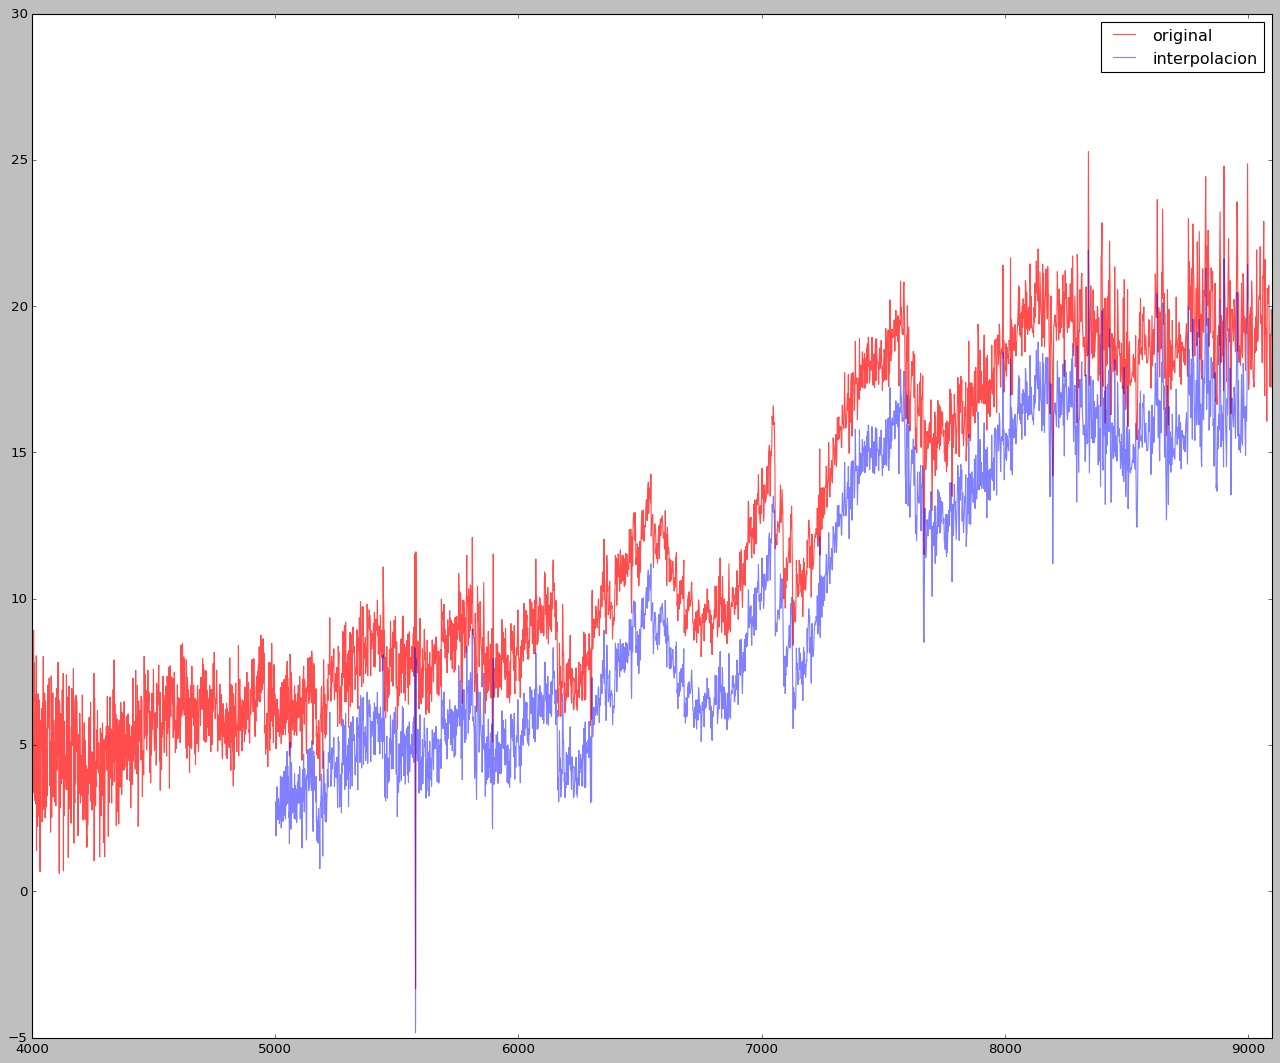

In [159]:
indice=700
x = df_info_obj_espec_zcorr.loc[indice]['long_A']
y = df_info_obj_espec_zcorr.loc[indice]['flujo']
f_inter = interpolate.interp1d(x, y)
new_flujo = f_inter(new_long)

plt.figure(figsize=(20,16))
plt.plot(x, [k+3 for k in y], color='r', label = 'original',alpha = 0.7) #desplazamos en 3 el espectro original
plt.plot(new_long, new_flujo, label='interpolacion', alpha = 0.5)
plt.xlim(4000,9100)
#plt.ylim(-4,10)
plt.legend()
plt.show()

Hacemos la interpolación para todos los espectros.

In [160]:
def fun_extrapolar(X, new_x):
  '''
  :param: X[0] longitudes de onda datos originales
  :paras: X[1] flujos originales
  :new_x: nuevas longitudes de onda sobre las que interpolar

  :return: flujos interpolados

  '''
  #new_x = np.arange(5000, 8000.5, 0.5)
  f_inter = interpolate.interp1d(X[0], X[1])
  return  f_inter(new_x)



In [161]:
df_obj_espectros_extrap = df_info_obj_espec_zcorr.copy()

In [162]:
df_obj_espectros_extrap.flujo = df_obj_espectros_extrap[['long_A','flujo']].apply(fun_extrapolar, new_x = new_long, axis=1)  



Se guarda la base de longitudes de onda en el primer registro del dataframe

In [185]:
df_obj_espectros_extrap.long_A = [new_long]+ [0]*(df_obj_espectros_extrap.shape[0]-1) 

Podemos inspeccionar graficamente los resultados.

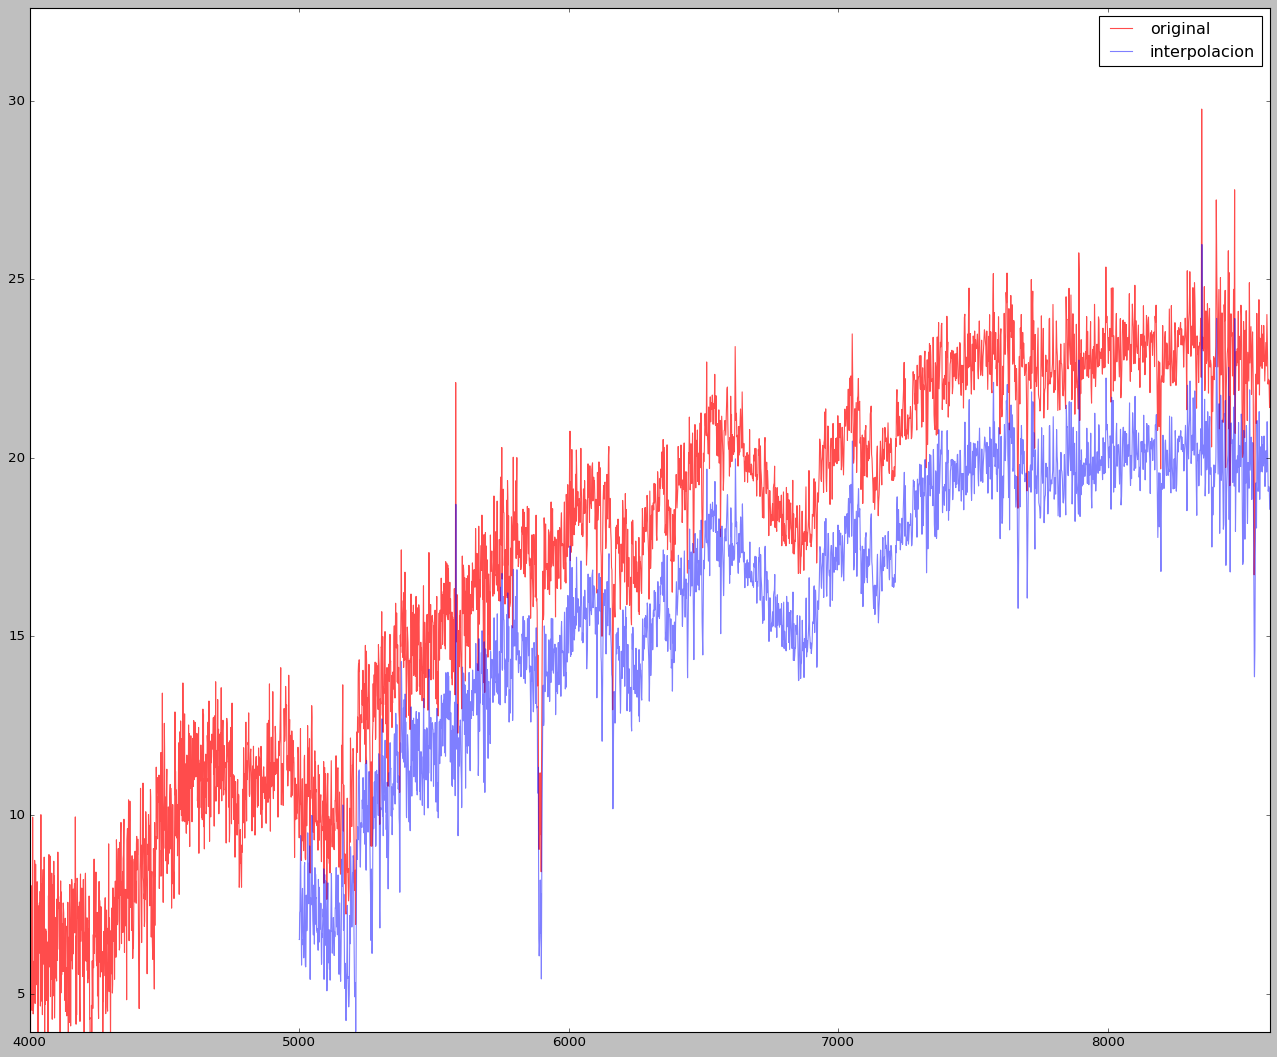

In [186]:
df_info_obj_espec_zcorrindice =1300

new_flujo = df_obj_espectros_extrap.loc[indice,'flujo']
x = df_info_obj_espec.loc[indice]['long_A']
y = df_info_obj_espec.loc[indice]['flujo']

plt.figure(figsize=(20,16))
plt.plot(x, [k+3 for k in y], color='r', label = 'original',alpha = 0.7) #desplazamos  el espectro original
plt.plot(new_long, new_flujo, label='interpolacion', alpha = 0.5)
plt.xlim(4000,8600)
plt.ylim(new_flujo.min(),4+new_flujo.max())
plt.legend()
plt.show()

#### Guardado y carga de los espectros SDSS extrapolados.

In [ ]:
df_obj_espectros_extrap.head(5)

In [ ]:
new_flujo.shape

Lo guardamos el dataset en formato json. (No es posible en csv)

In [ ]:
import json


In [ ]:
directorio = '../Espectros/datos_json/'
df_obj_espectros_extrap.to_json(directorio+'EM_muestra5000_cat_West_datos_obj_espectros_extrapolados.json')

In [ ]:
df_ = df_obj_espectros_extrap.copy()

Comprobamos que se lee correctamente.

In [ ]:
directorio = '../Espectros/datos_json/'
df_obj_espectros_extrap = pd.read_json(directorio+'EM_muestra5000_cat_West_datos_obj_espectros_extrapolados.json')


In [ ]:
df_obj_espectros_extrap.info()

In [ ]:
df_obj_espectros_extrap

## Filtrado de los espectros

Utilizaremos ondículas. Es importante que los flujos correspondan a longitudes de onda equiespaciadas. Eso lo hemos hecho cuando hemos definido una base estándar de longitudes de onda.

In [187]:
w_type='sym3'
#print(pywt.Wavelet(wavelet_type))

Tras diversas pruebas decompondremos hasta nivel 6 y eliminaremos los tres coeficientes de detalle más bajos. 


Definimos una función que nos filtrará usando ondículas y que nos eliminaré outliers de los flujos

In [188]:
def filtrado_ondiculas(datos,ondicula, nivel, coef_a_anular,longitud,n_sigma=100):
  """
  Filtrado con ondículas.
  :param: tipo de ondícula
  :param: array de datos a filtrar.
  :param: nivel: nivel para la transformada
  :param:coef_a_anular: lista con los coeficientes de detalle a anular
  :param:tamaño de los datos a devolver
  :return: datos filtrados.
  """
  datos = np.asarray(datos)
  media = datos.mean()
  std = datos.std()
  def quitar_outliers(n_sigma,media,std):
    def suavizar(x):
      if x > media +n_sigma*std:
        x= media+std
      elif x<media-n_sigma*std:
        x=media-std
      return x
    return suavizar
  
  suavizado = quitar_outliers(n_sigma, media, std)
  datos = np.asarray(list(map(suavizado,datos)))

  DWTcoeffs = pywt.wavedec(datos,ondicula,mode='sym', level=nivel, axis=-1)
  for coef_to_cero in coef_a_anular:
    DWTcoeffs[coef_to_cero] = np.zeros_like(DWTcoeffs[coef_to_cero])
    
  return pywt.waverec(DWTcoeffs,ondicula,mode='sym',axis=-1)[:longitud]
    #return np.asarray(y)[:longitud]

Recuperamos las longitudes de onda.

In [189]:
new_long = np.asarray(df_obj_espectros_extrap.iloc[0]['long_A'])
new_long.shape

(7999,)

### Espectros enanas marrones catalogo West

Aplicamos los mismos parámetros para filtrar

In [190]:
df_obj_espectros_extrap.columns

Index(['PLATE-MJD-FIBER', 'flujo', 'long_A', 'PLATEQUALITY', 'extrapolado',
       'max_long_A', 'Z', 'Z_ERR', 'CLASS', 'SUBCLASS', 'outlier_info',
       'outrango_info', 'SpT', 'clase_metalicidad', 'subclass_c'],
      dtype='object')

In [191]:
df_espectros_filtrados_em = df_obj_espectros_extrap[['PLATE-MJD-FIBER','flujo']]
df_espectros_filtrados_em['flujo']=df_espectros_filtrados_em['flujo'].apply(filtrado_ondiculas, ondicula= 'sym3', nivel=6, coef_a_anular=[3,4,5,6],longitud=new_long.shape[0], n_sigma=4)


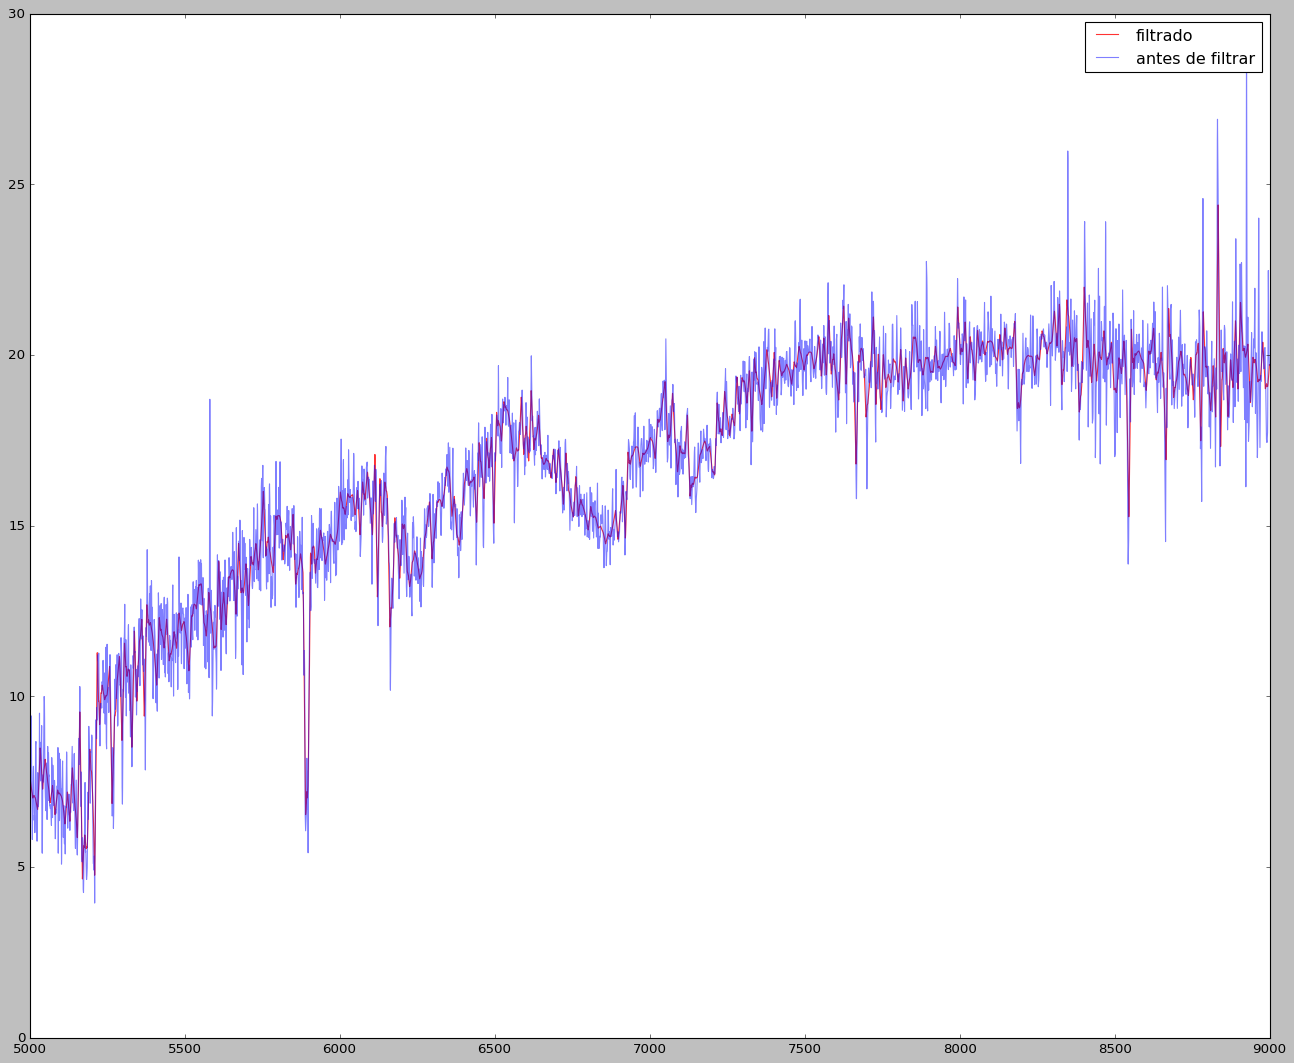

In [192]:
indice =3000

y_ = df_obj_espectros_extrap.loc[indice,'flujo']
x = new_long
y = df_espectros_filtrados_em.loc[indice,'flujo']

plt.figure(figsize=(20,16))
plt.plot(x, y, color='r', label = 'filtrado',alpha = 0.8) #desplazamos  el espectro 
plt.plot(x, y_, color ='b', label='antes de filtrar', alpha = 0.5)
#plt.xlim(7475,7525)
#plt.ylim(min(y),max(y))
plt.legend()
plt.show()

In [196]:
df_espectros_filtrados_em

,PLATE-MJD-FIBER,flujo
0,330-52370-566,"[16.464015070581485, 16.42190617163296, 16.380..."
1,377-52145-512,"[1.9482728849694748, 1.9770022935338905, 2.004..."
2,377-52145-513,"[1.347312945274041, 1.36096738802237, 1.375171..."
3,378-52146-160,"[0.342315597040115, 0.35507686843470987, 0.367..."
4,378-52146-194,"[1.1084906314028309, 1.1826270333401394, 1.254..."
...,...,...
9671,2955-54562-382,"[8.51381981233066, 8.55661912422859, 8.5986224..."
9672,2955-54562-388,"[0.11053554305432794, 0.1018317487593283, 0.09..."
9673,2955-54562-449,"[7.438083178535993, 7.399486425528919, 7.36247..."
9674,2955-54562-542,"[0.38311910957041984, 0.38099957699758863, 0.3..."


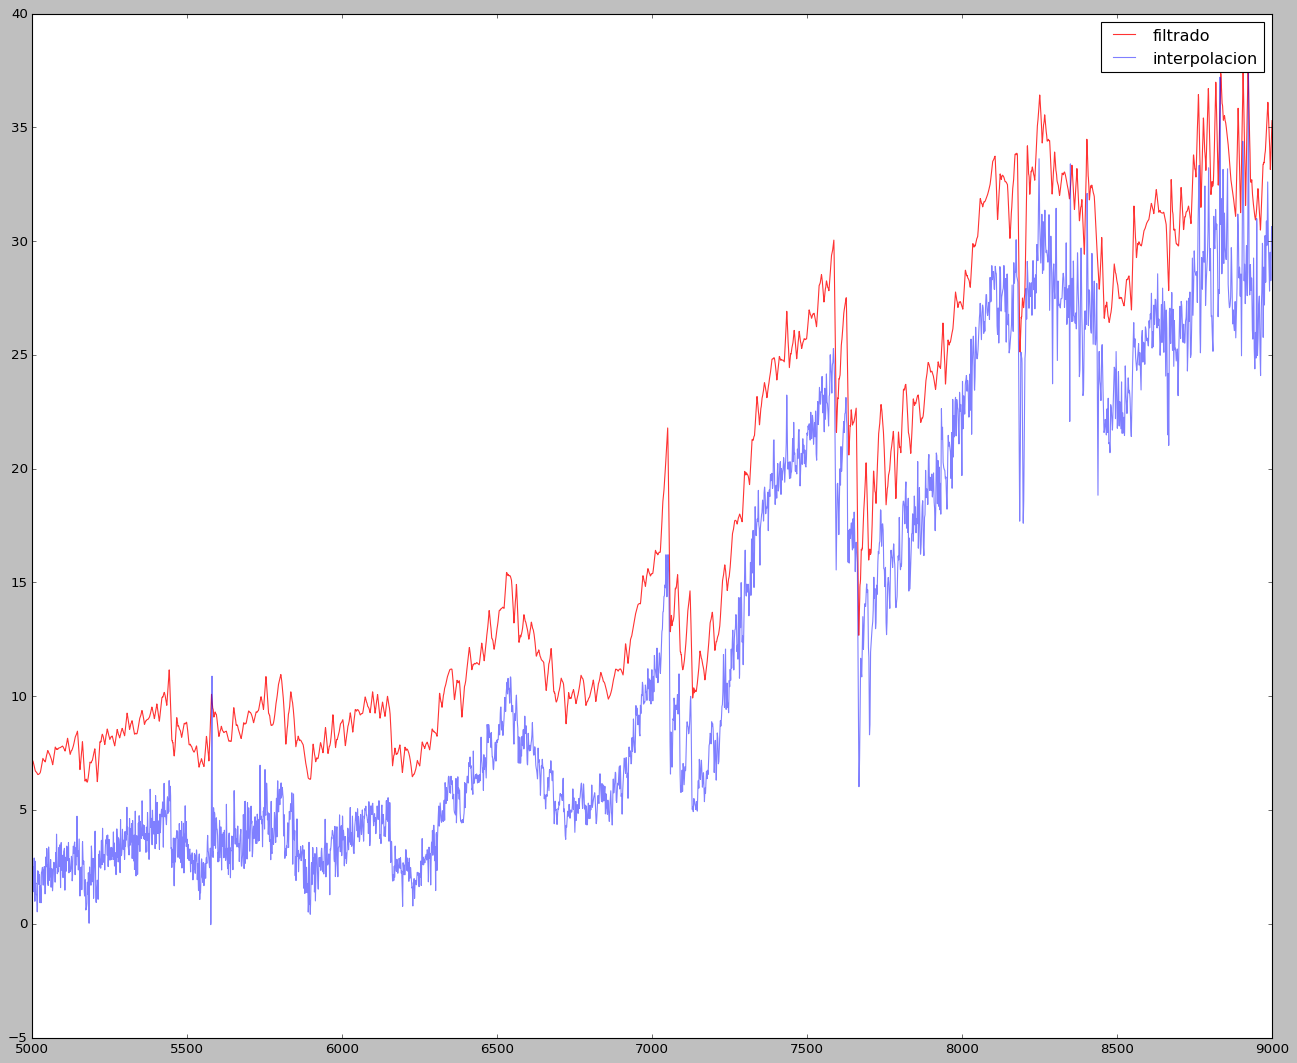

In [197]:
indice =1500

y_ = df_obj_espectros_extrap.loc[indice,'flujo']
x = new_long
y = df_espectros_filtrados_em.loc[indice,'flujo']

plt.figure(figsize=(20,16))
plt.plot(x, y+5, color='r', label = 'filtrado',alpha = 0.8) #desplazamos  el espectro 
plt.plot(x, y_, label='interpolacion', alpha = 0.5)
#plt.xlim(7475,7525)
#plt.ylim(min(y),max(y))
plt.legend()
plt.show()

## Normalización de los espectros

 Haremos la normalización usando la mediana del intervalo 7500+/- 25 Armstrong.

In [198]:
def normalizacion(espectro ,rang_lo, lo_norm, delta):
  """
  Función: Normaliza el espectro dividiendo por un flujo de normalización

  :param: espectro_[0] flujo del espectro a normalizar
  :param: rang_lo longitudes de onda correspondientes.
  :param: lo_norm: logitud de onda cuyo flujo se tomará como referencia.
  :param: delta: El flujo para normalizar se calculará como la mediana de los flujos en el intervalo [lo_norm-delta, lo_norm+delta]
  :RETURN: flujo normalizado
  """
  espectro = np.asarray(espectro)
  rang_lo = np.asarray(rang_lo)

  rango = np.where((rang_lo>=lo_norm-delta)&(rang_lo<=lo_norm+delta))
  mediana = np.median(espectro[rango])
  return espectro/mediana



### Normalización de los espectros enanas marrones catalago West

In [199]:
df_espectros_normalizados_sd = df_espectros_filtrados_em.copy()
df_espectros_normalizados_sd['flujo']=df_espectros_normalizados_sd['flujo'].apply(normalizacion,rang_lo=new_long, lo_norm=7500, delta=25)
df_espectros_normalizados_sd.head(3)

,PLATE-MJD-FIBER,flujo
0,330-52370-566,"[0.3426597651034117, 0.3417833673741452, 0.340..."
1,377-52145-512,"[0.1528373250695158, 0.15509107811904477, 0.15..."
2,377-52145-513,"[0.1978786594445537, 0.1998840753621987, 0.201..."


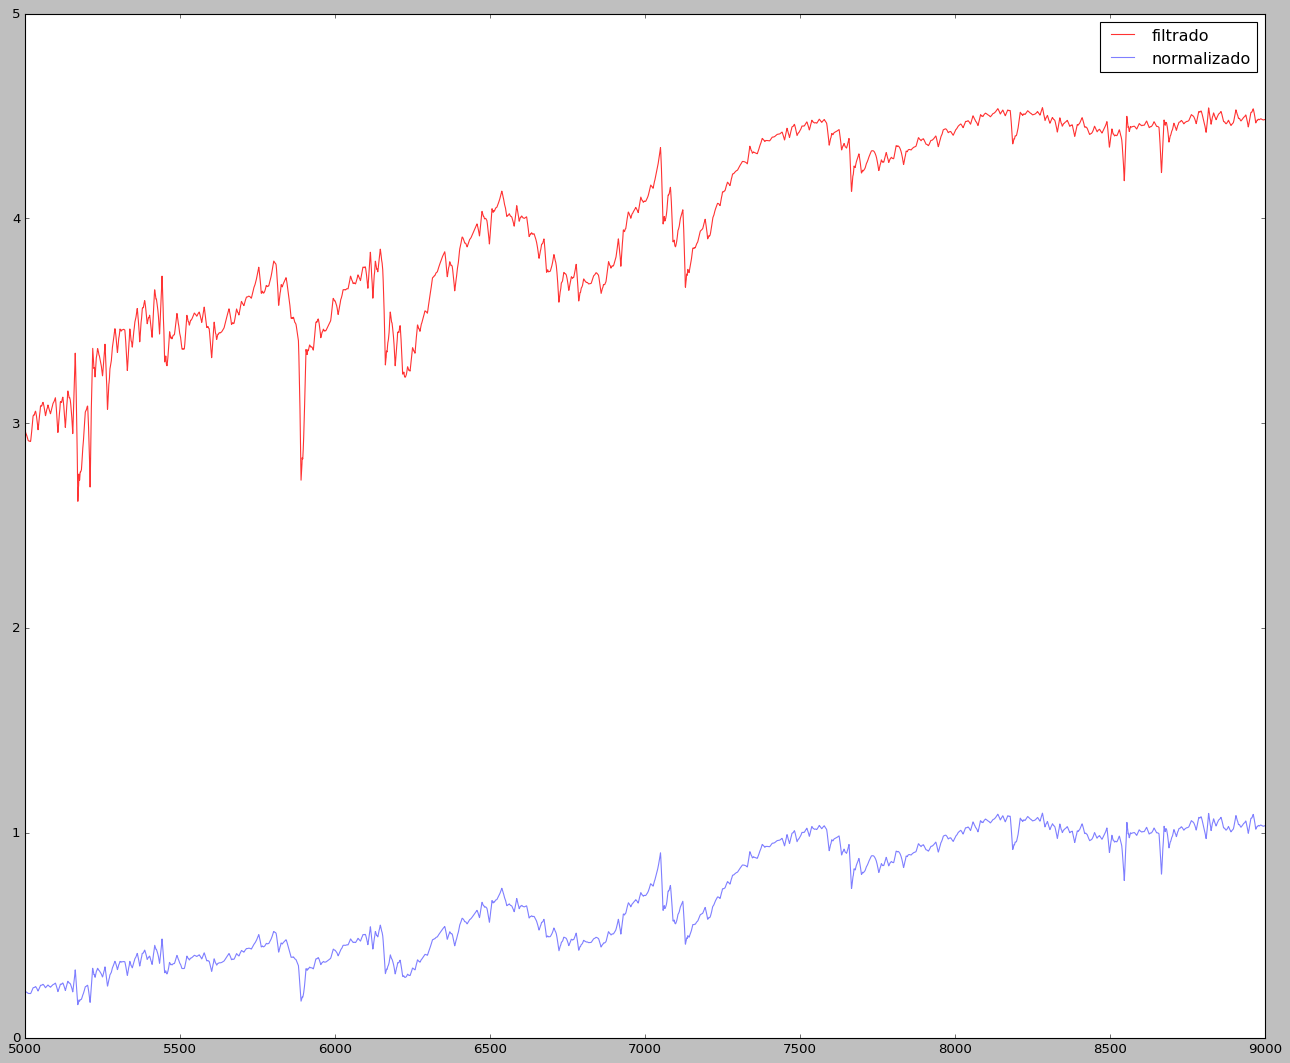

In [200]:
indice =3780
y_ = df_espectros_normalizados_sd.loc[indice,'flujo']
x = new_long
y = df_espectros_filtrados_em.loc[indice,'flujo']

plt.figure(figsize=(20,16))
plt.plot(x, np.log(y), color='r', label = 'filtrado',alpha = 0.8) #desplazamos  el espectro 
plt.plot(x, y_, label='normalizado', alpha = 0.5)
#plt.xlim(7475,7525)
#plt.ylim(min(y_),max(y_))
plt.legend()
plt.show()

###  Guardado y carga de los espectros SDSS del catálogo West normalizados.

In [ ]:
import json


In [ ]:
directorio = '../Espectros/datos_json/'
df_espectros_normalizados_sd.to_json(directorio+'EM_muestra5000_cat_West_espectros_normalizados.json')

In [ ]:
df_ = df_espectros_normalizados_sd.copy()

Comprobamos que se lee correctamente.

In [ ]:
directorio = '../Espectros/datos_json/'
df_obj_espectros_normalizados_sd = pd.read_json(directorio+'EM_muestra5000_cat_West_espectros_normalizados.json')


In [ ]:
df_obj_espectros_normalizados_sd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4839 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SPECOBJID  4839 non-null   int64 
 1   flujo      4839 non-null   object
dtypes: int64(1), object(1)
memory usage: 113.4+ KB


In [ ]:
df_obj_espectros_normalizados_sd

,SPECOBJID,flujo
0,444845392081741824,"[0.2324986665, 0.23103466560000002, 0.22910667..."
1,444877827674761216,"[0.7348352181000001, 0.7406319491000001, 0.746..."
2,445995756675950592,"[0.22057972620000002, 0.2225706901, 0.22428048..."
3,446016097641064448,"[0.0274112523, 0.0270153493, 0.026672312700000..."
4,447079325016025088,"[0.7608991954000001, 0.7584297590000001, 0.754..."
...,...,...
4995,3348441243397941248,"[0.1770702355, 0.17948987800000002, 0.18283920..."
4996,3348445916322359296,"[0.5346638631, 0.5421084181, 0.5529174927, 0.5..."
4997,3348467356799100928,"[0.1730164684, 0.1725764877, 0.171778633000000..."
4998,3348534152130488320,"[-0.0176681755, -0.015016339, -0.0110082027, -..."


##Submuestreo espectros

Como última parte con el fin de trabajar con menos datos vamos a submuestrear. En un primer intento nos quedaremos con 1600 muestras por espectro. Teníamos 7999 muestras en cada espectro. Repetiremos la última para tener 8000. Haremos intervalos de 5 longitudes de onda y asignaremos la mediana como el valor correspondiente a la longitud central del intervalo en el espectro submuestreado

In [201]:
#Recortamos la lista para que la primera longitud de onda sea la central del primer intervalor
sub_long_1 = new_long[2:]
print(sub_long_1[0])
new_long[0:5]

5001.5


array([5000.5, 5001. , 5001.5, 5002. , 5002.5])

In [202]:
#Seleccionamos cada 5.
sub_long=sub_long_1[::5]
print(sub_long.shape)
sub_long[:5] #nuevas longitudes de onda

(1600,)


array([5001.5, 5004. , 5006.5, 5009. , 5011.5])

## Muestra enanas marrones M del catálogo West.


Necesitamos 8000 valores del flujo por espectro pero solo tenemos 7999. Repetiremos el último.

In [203]:
df_espectros_normalizados_sd['flujo'][0].shape

(7999,)

In [204]:
flujos_inc = list(map(lambda x: np.asarray(list(x)+[x[-1]]),df_espectros_normalizados_sd['flujo']))
flujos_inc[0].shape

(8000,)

Definimos la función para submuestrear.

In [205]:
def fun_submuestreo(intervalo = 5,n_new_flujos=1600):
  """
  :param: flujos de un objeto. dim 8000
  :param: intervalor. tamaño del intervalo sobre el que se calculará la mediana
  :return: array con 1600 valores para el flujo submuestreado. Mediana de cada intervalo de 5 flujos
  """
  def submuestreo(flujos):
    new=np.empty((1,n_new_flujos))
    for i in range(intervalo):
      #desplazamos en cada iteración los flujos. Muestraemos con intervalo. 
      #Apilamos cada desplazamiento
      new=np.concatenate((new,flujos[i:][::intervalo].reshape(-1,n_new_flujos)),axis=0)
    #return new
    return np.median(new[1:,:],axis=0)
  return submuestreo

La probamos

In [206]:
sub_m = fun_submuestreo(intervalo = 5,n_new_flujos=1600)

In [207]:
test = sub_m(flujos_inc[0])

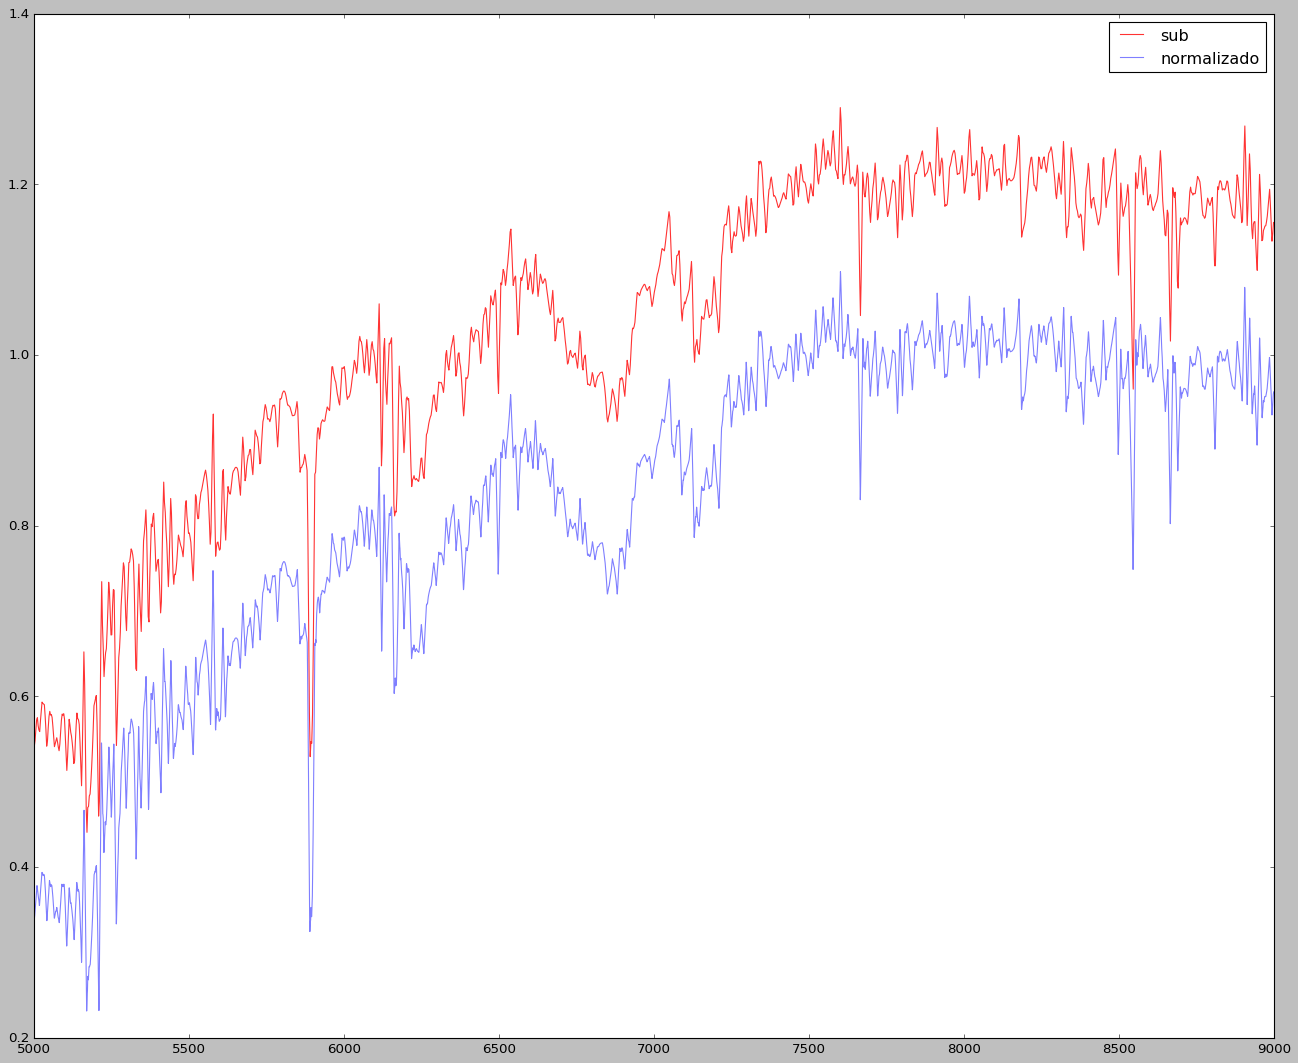

In [208]:
y_ = df_espectros_normalizados_sd.iloc[0]['flujo']
x_ = new_long
y = test
x = sub_long

plt.figure(figsize=(20,16))
plt.plot(x, y+0.2, color='r', label = 'sub',alpha = 0.8) #desplazamos  el espectro 
plt.plot(x_, y_, label='normalizado', alpha = 0.5)
#plt.xlim(7400,7600)
#plt.ylim(min(y_),max(y_))
plt.legend()
plt.show()

La aplicamos a todos los espectros

In [209]:
sub_m = fun_submuestreo(intervalo = 5,n_new_flujos=1600)

In [210]:
flujos_sub_em = np.asarray(list(map(sub_m,flujos_inc)))
flujos_sub_em.shape

(9676, 1600)

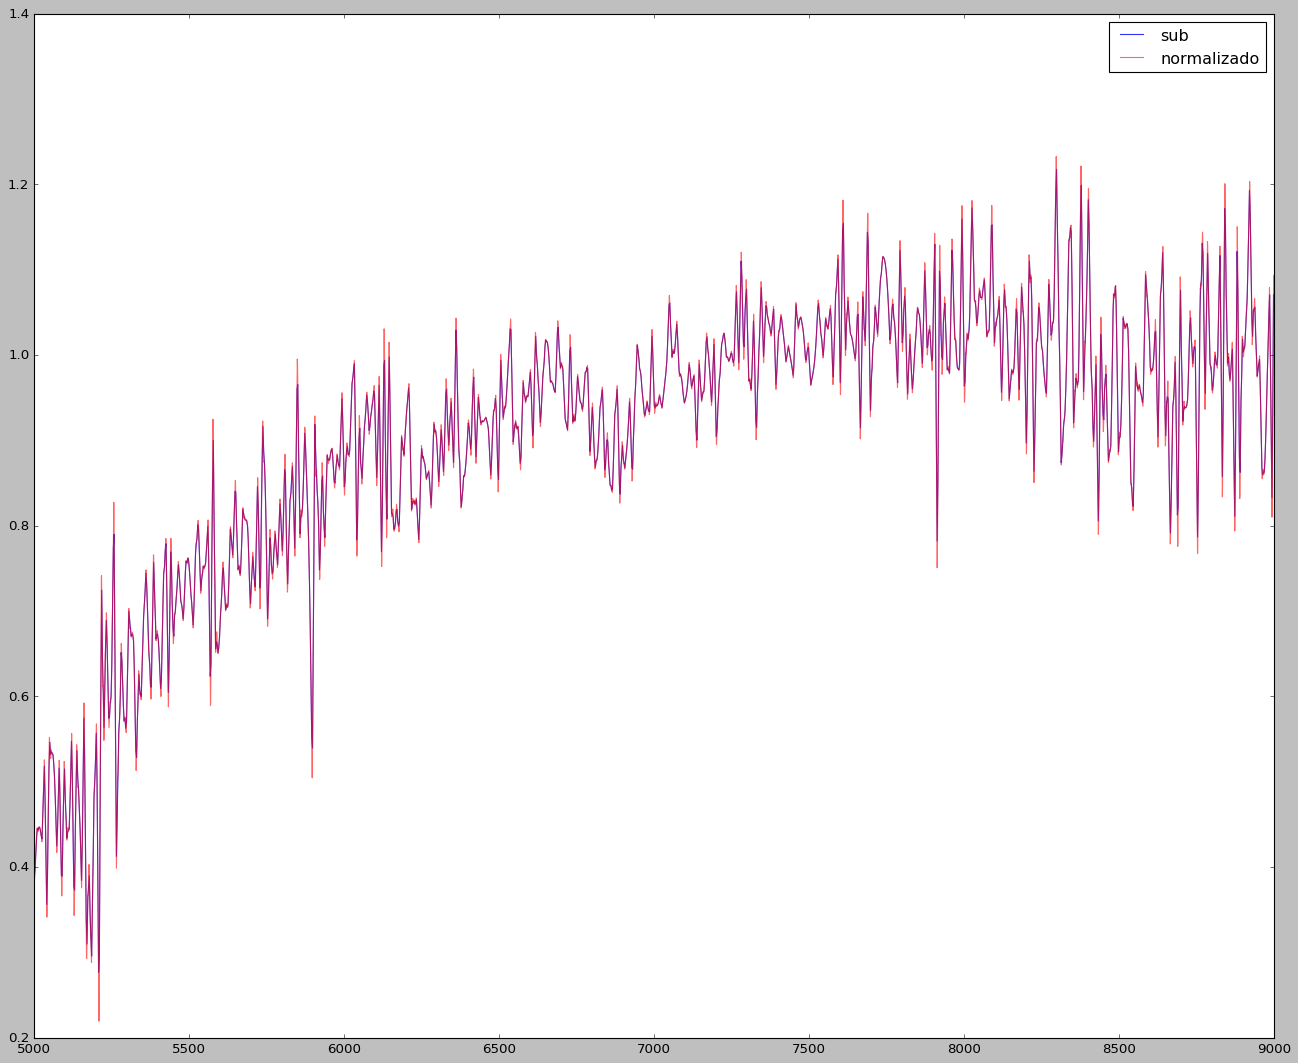

In [211]:
indice =2000

y_ = df_espectros_normalizados_sd.iloc[indice]['flujo']
x_ = new_long
y = flujos_sub_em[indice]
x = sub_long

plt.figure(figsize=(20,16))
plt.plot(x, y, color='b', label = 'sub',alpha = 0.8) #desplazamos  el espectro 
plt.plot(x_, y_, color='r', label='normalizado', alpha = 0.6)
#plt.xlim(7400,7600)
#plt.ylim(min(y_),max(y_))
plt.legend()
plt.show()

#### Guardado datos limpiados, filtrados y submuestreados muestra de las EM catálogo West.

La siguiente fase será ya clustering. Vamos a guardar la matriz con los flujos por un lado y el de las longitudes de onda por otro. Así mismo guardaremos el resto de la información de las subenanas en csv.

In [212]:
print(flujos_sub_em.shape)
df_obj_espectros_extrap.shape #contiene los espectros e información.

(9676, 1600)


(9676, 15)

En df_obj_espectros_extrap los flujos y longitudes de onda no son los procesados y submuestreados, por ello eliminamos dichas columnas.

In [213]:
df_info_enanas_EM = df_obj_espectros_extrap.drop(columns= ['flujo', 'long_A'],inplace=False)
df_info_enanas_EM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9676 entries, 0 to 9675
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLATE-MJD-FIBER    9676 non-null   object 
 1   PLATEQUALITY       9676 non-null   object 
 2   extrapolado        9676 non-null   bool   
 3   max_long_A         9676 non-null   float64
 4   Z                  9676 non-null   float64
 5   Z_ERR              9676 non-null   float64
 6   CLASS              9676 non-null   object 
 7   SUBCLASS           9676 non-null   object 
 8   outlier_info       9676 non-null   bool   
 9   outrango_info      9676 non-null   bool   
 10  SpT                9676 non-null   object 
 11  clase_metalicidad  9676 non-null   object 
 12  subclass_c         9676 non-null   object 
dtypes: bool(3), float64(3), object(7)
memory usage: 784.4+ KB


También guardaramos toda la información en un fichero numpy comprimido

In [215]:
subclases=np.asarray(df_info_enanas_EM['SUBCLASS'])

In [216]:
directorio = '../Espectros/datos_json/'
df_info_enanas_EM.to_csv(directorio+"info_muestra_tratada_EM_cat_West_10000.csv")
np.savez_compressed(directorio+'muestra_EM_cat_West_10000_tratada.npz', 
                    flujos=flujos_sub_em,
                    long_onda=sub_long,
                    subclases=subclases,
                    datos=df_info_enanas_EM.values,
                    columnas=df_info_enanas_EM.columns)

Comprobamos que se leen correctamente.

In [217]:
directorio = '../Espectros/datos_json/'
muestra_BD = np.load(directorio+'muestra_EM_cat_West_10000_tratada.npz',allow_pickle=True)
muestra_BD.files


['flujos', 'long_onda', 'subclases', 'datos', 'columnas']

In [218]:
flujos_BD, long_onda,subclases, datos, columnas = [muestra_BD[f] for f in muestra_BD.files]

In [ ]:
datos

array([[444845392081741824, "'00:57:41.55'", "'+00:31:25.50'", ...,
        'STAR', 'M2', 'd'],
       [444877827674761216, "'01:00:10.53'", "'+00:37:39.20'", ...,
        'STAR', 'M3', 'd'],
       [445995756675950592, "'01:05:50.48'", "'+00:31:49.28'", ...,
        'STAR', 'M4', 'd'],
       ...,
       [3348467356799100928, "'17:22:39.51'", "'+30:30:38.38'", ...,
        'STAR', 'M4', 'd'],
       [3348534152130488320, "'17:18:24.95'", "'+32:14:31.07'", ...,
        'STAR', 'M7', 'd'],
       [3348583355275831296, "'17:23:28.71'", "'+31:12:07.32'", ...,
        'STAR', 'M0', 'd']], dtype=object)

In [220]:
flujos_BD[0].shape

(1600,)

In [222]:
flujos_BD.shape

(9676, 1600)

In [223]:
columnas

array(['PLATE-MJD-FIBER', 'PLATEQUALITY', 'extrapolado', 'max_long_A',
       'Z', 'Z_ERR', 'CLASS', 'SUBCLASS', 'outlier_info', 'outrango_info',
       'SpT', 'clase_metalicidad', 'subclass_c'], dtype=object)

In [ ]:
subclases

array(['M2', 'M2', 'M4', ..., 'M5', 'M8', 'M0'], dtype=object)

In [ ]:
del muestra_BD

# Final